Problem Statement: Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

In [1]:
# importing required initial libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# import data and check 6 different samples

data = pd.read_csv('avocado.csv')
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',data.shape[0])
print('No. of Columns :', data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
data.head()

No. of Rows : 18249
No. of Columns : 14


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
# Observations:

# This Dataset has 18249 rows and 14 columns. Let's study the column's names and their charectaristics.

In [5]:
# checking columns names

data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Data Integrity Check

In [6]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [7]:
data.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [8]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [9]:
data.duplicated().sum()

0

In [10]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [11]:
# Observations:

# No duplicate values present in the dataframe

# Null Values Handling

In [12]:
# Checking the sum of null values for all columns
    
data.isnull().sum().sum()

0

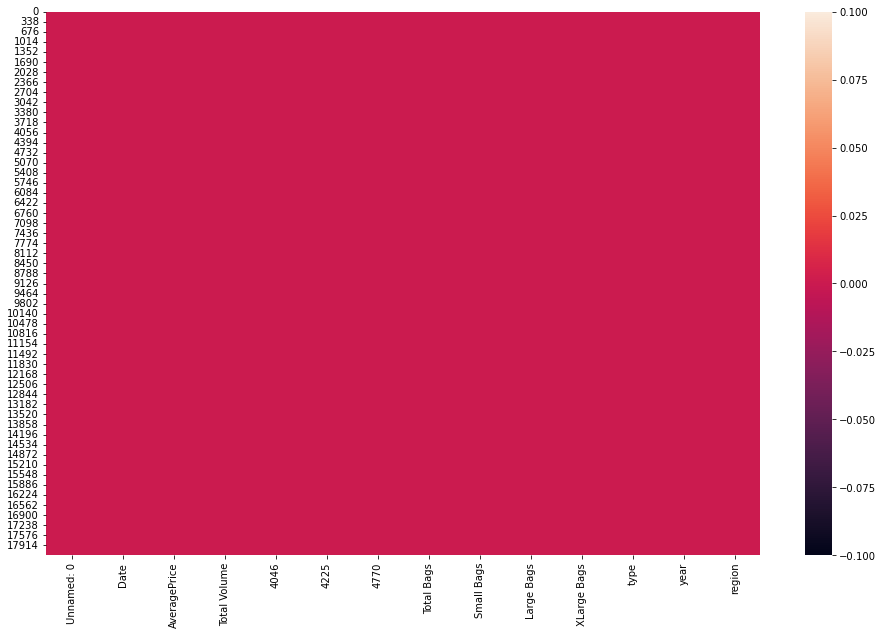

In [13]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(data.isnull())
plt.show()

In [14]:
# Observations:

# No null values are present in the total dataset.

# Descriptive Statistics

In [15]:
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [16]:
# Observations:

# We can see in Large Bags,XLarge Bags and 4770 has avacado the minimum values is Zero.

# Some features are highly right skewed like 4046,4225,total bags etc.

# There seems to be outliers in the data set

In [17]:
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Month']=pd.DatetimeIndex(data['Date']).month
data['day']=pd.DatetimeIndex(data['Date']).day

In [18]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Year  Month  day  
0  2015  Albany  2015     12   27  
1  2015  Albany  2015     12   20  
2  2015  Albany  2015     12   13  
3  2015  Albany  2015     12    6  
4  2015  Albany  2015     11   29

In [19]:
#dropping the unnecessary columns
data=data.drop(['Unnamed: 0','Date','year'],axis=1)

In [20]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  day  
0     8603.62       93.25          0.0  conventional  Albany  2015     12   27  
1     9408.07       97.49          0.0  conventional  Albany  2015     12   20  
2     8042.21      103.14          0.0  conventional  Albany  2015     12   13  
3     5677.40      133.76          0.0  conventional  Albany  2015     12    6  
4     5986.26      197.69          0.0  conventional  Albany  2015     11   29

In [21]:
# Checking column name
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  int64  
 12  Month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [23]:
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
region             54
Year                4
Month              12
day                31
dtype: int64

In [24]:
# Observations:

# No null values are present.

# Target variable is 'AveragePrice' and it is a float64 datatype. So it is a Regression problem.

# Exploration of Categorical data:-


In [25]:
# Checking different unique values for categorical features

# 1. type:

data["type"]. unique()

array(['conventional', 'organic'], dtype=object)

In [26]:
data["type"]. value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

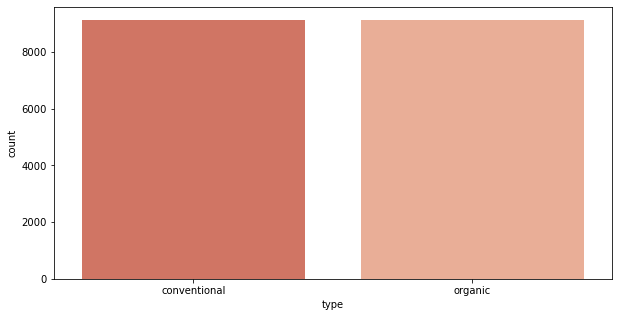

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data['type'])
plt.show()

In [28]:
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [29]:
# Observations:

# Type has two groups and the mean of target (AveragePrice) with respect to organic is greater than other.

In [30]:
# 2. region:

data["region"]. unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [31]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

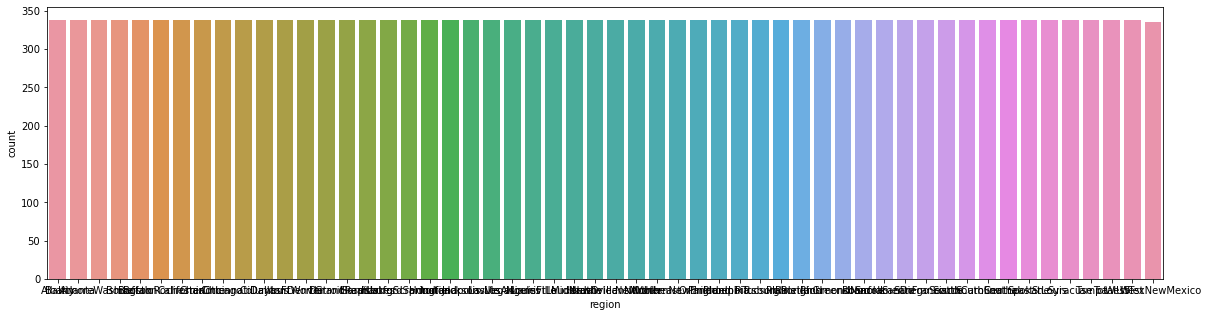

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(data['region'])
plt.show()

In [33]:
# Observations:

# Here all 54 regions are same value counts. the dataset is not imbalanced with respect to region.

# Exploration of Numarical data:-

In [34]:
# 1. For discrete datatype(year) :-

data["Year"]. unique()

array([2015, 2016, 2017, 2018])

In [35]:
data["Year"]. value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

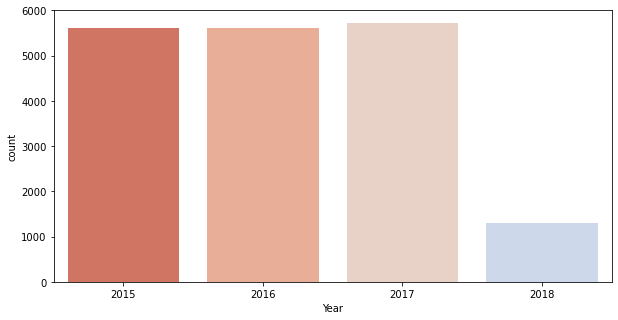

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data['Year'])
plt.show()

In [37]:
data.groupby('Year')['AveragePrice'].mean()

Year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [38]:
# Observations:

# There are 4 different types of 'year'. 2018 has the lowest value count.

# he mean of target (AveragePrice) with respect to year 2017 is greater than others.

In [39]:
# Exploration of day and months:-

data["day"]. value_counts().sort_index(ascending=True)

1     648
2     432
3     648
4     756
5     648
6     539
7     540
8     648
9     432
10    648
11    756
12    648
13    540
14    540
15    648
16    432
17    648
18    755
19    648
20    540
21    540
22    648
23    432
24    648
25    755
26    648
27    540
28    540
29    540
30    432
31    432
Name: day, dtype: int64

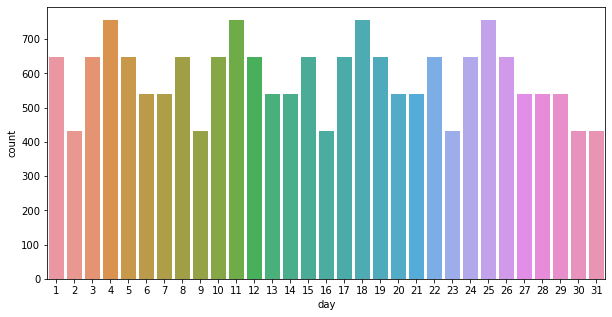

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data['day'])
plt.show()

In [41]:
data["Month"]. value_counts().sort_index(ascending=True)

1     1944
2     1728
3     1836
4     1404
5     1512
6     1294
7     1512
8     1404
9     1296
10    1512
11    1404
12    1403
Name: Month, dtype: int64

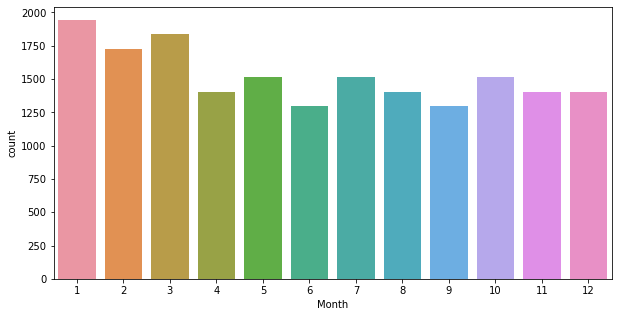

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data['Month'])
plt.show()

In [43]:
# Observations:

# Day has 31 values and the count range is 400-600

# Month has 12 values and the count range is 1250-1750

# The sale is high for 1st, 2nd and 3rd and comparively low for 8th, 9th and 6th months.

# Exploration of target variable:

In [44]:
data.AveragePrice.min()

0.44

In [45]:
data.AveragePrice.max()

3.25

In [46]:
data.AveragePrice.mean()

1.4059784097758825

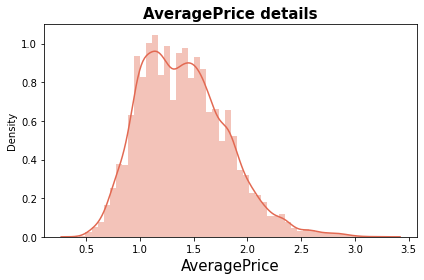

In [47]:
sns.distplot(data.AveragePrice)
plt. title('AveragePrice details',fontsize= 15, fontweight='bold')

plt. xlabel('AveragePrice', fontsize= 15)
plt.tight_layout()
plt.show()

In [48]:
# Observations:

# AveragePrice is target and it is a right skewed data.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

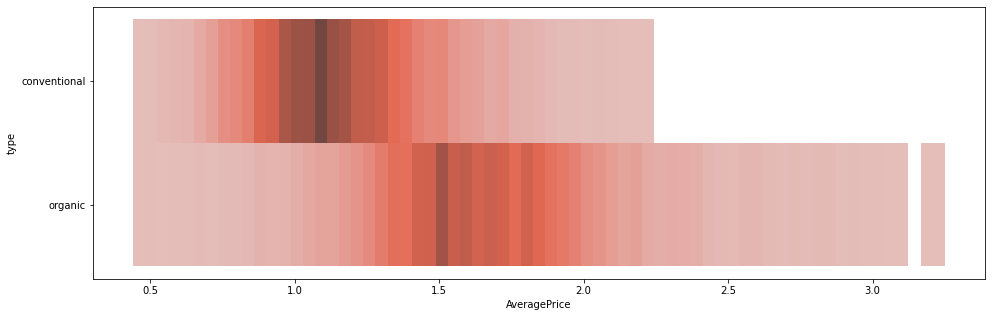

In [49]:
plt.figure(figsize=(16,5))
sns.histplot(y="type", x="AveragePrice", data=data)

In [50]:
# Observations:

# Outliers are present in both types of avocado.

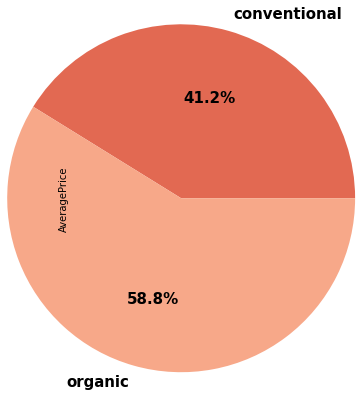

In [51]:
data.groupby('type')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

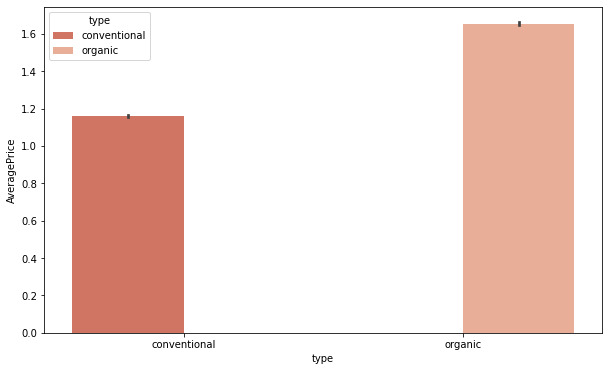

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='type', y='AveragePrice', hue='type',data=data)
plt.show()

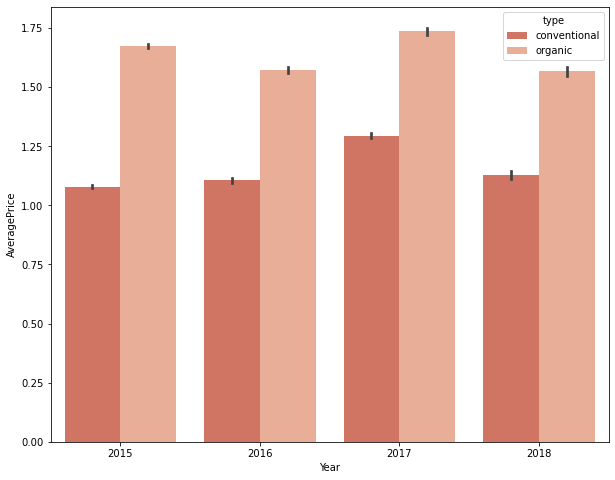

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x='Year', y='AveragePrice', hue='type',data=data)
plt.show()

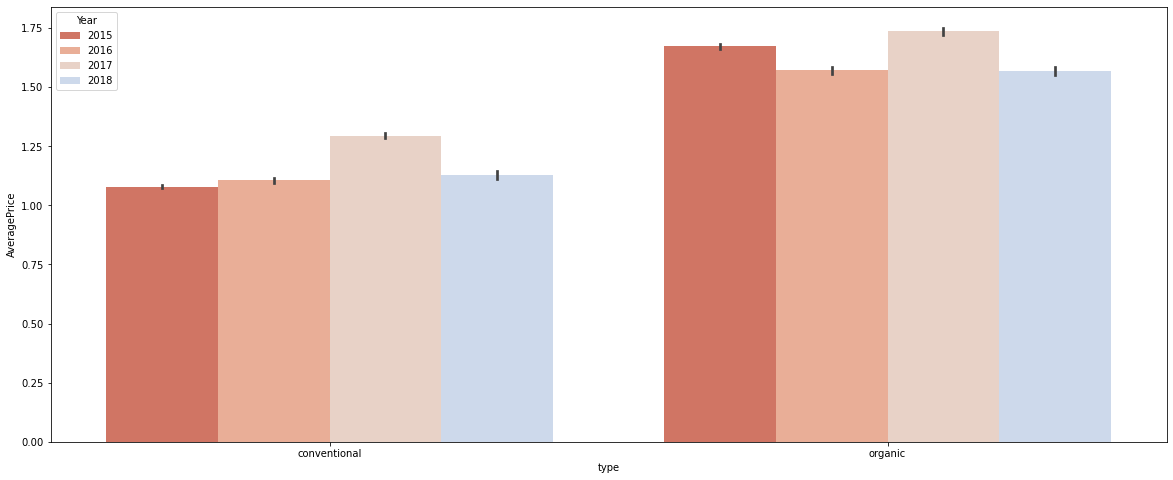

In [54]:
plt.figure(figsize=(20,8))
sns.barplot(x='type', y='AveragePrice', hue='Year',data=data)
plt.show()


In [55]:
# Observations:

# AveragePrice of organic is greater than conventional in every year.

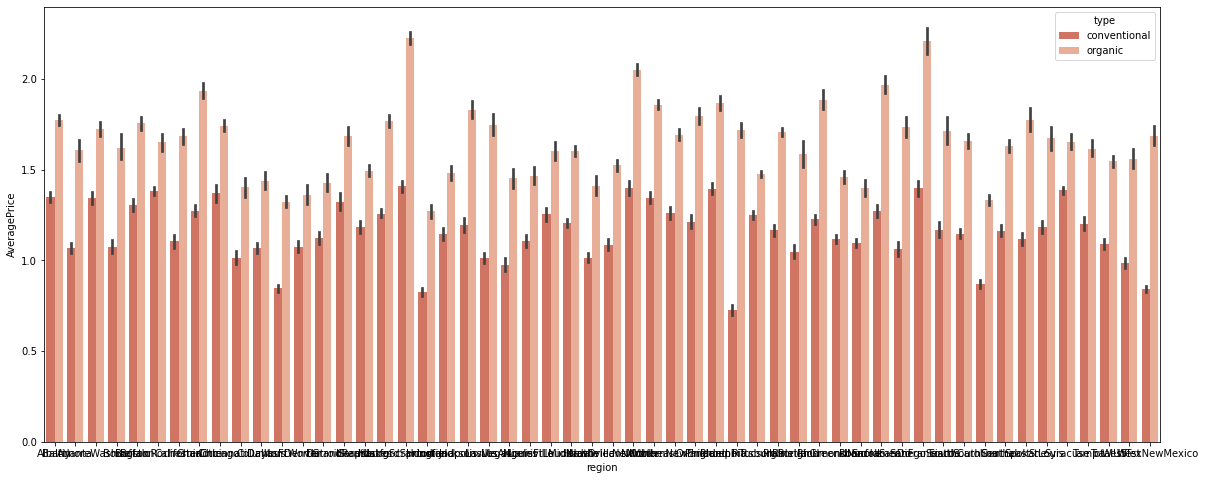

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()

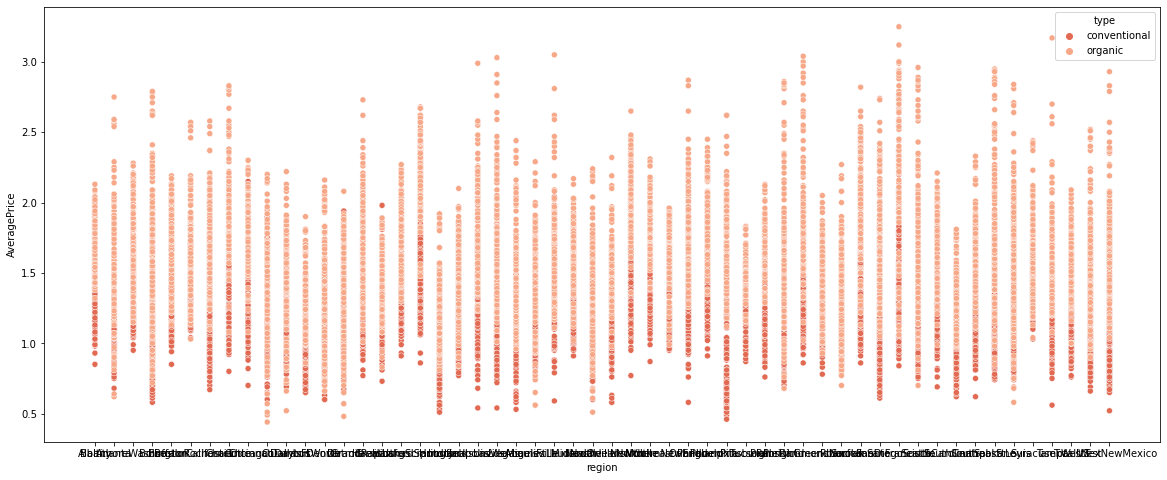

In [57]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()


<Figure size 1440x720 with 0 Axes>

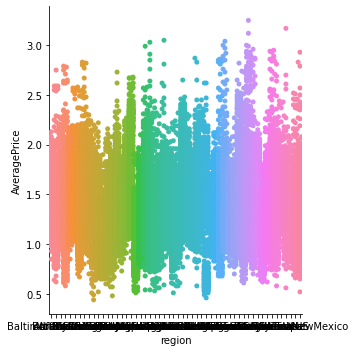

In [58]:
plt.figure(figsize=(20,10))
sns.catplot(x = "region", y = "AveragePrice", kind ='swarm', data=data)
plt.show()


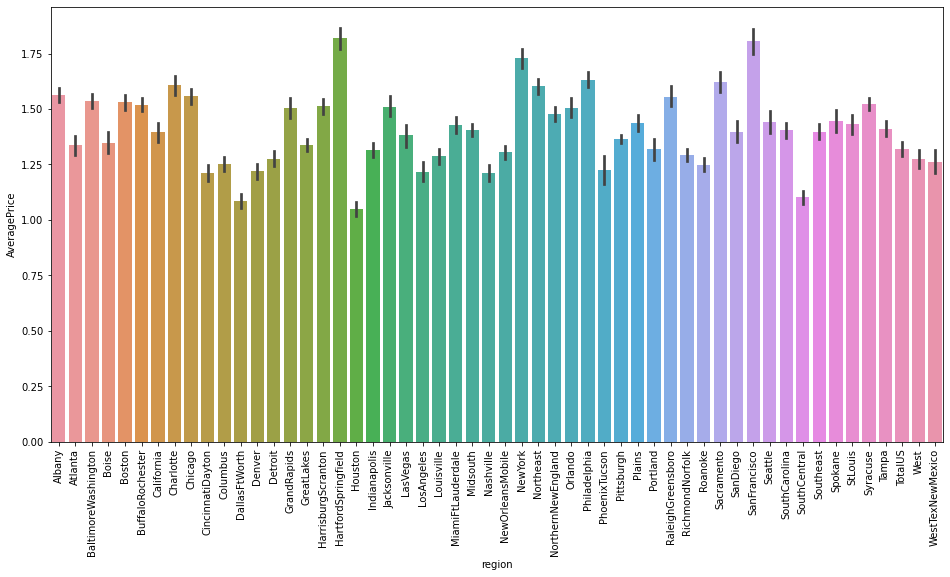

In [59]:
plt.figure(figsize=(16,8))
sns.barplot(x=data['region'],y=data['AveragePrice'], data=data)
plt.xticks(rotation=90)
plt.show()


In [60]:
# Observations:

# For every region the avg price of organic is greater than conventional

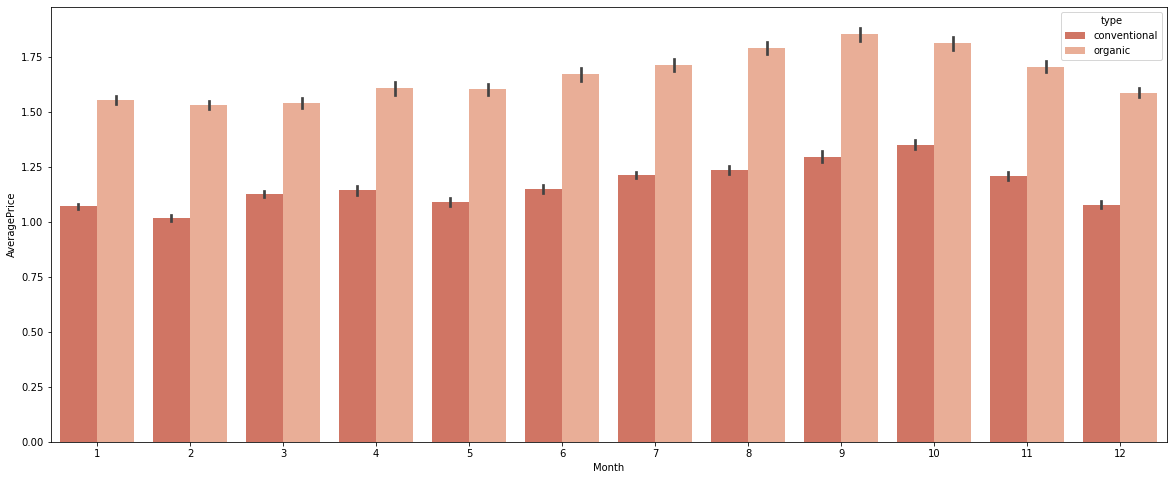

In [61]:
plt.figure(figsize=(20,8))
sns.barplot(x='Month', y='AveragePrice', hue='type',data=data)
plt.show()


<Figure size 1440x720 with 0 Axes>

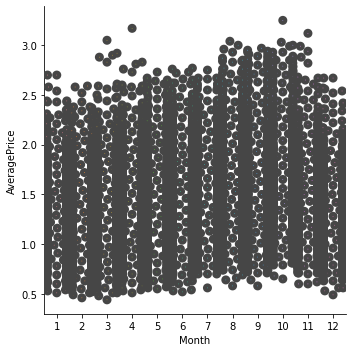

In [62]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='swarm', data=data, linewidth=4)
plt.show()

<Figure size 1440x720 with 0 Axes>

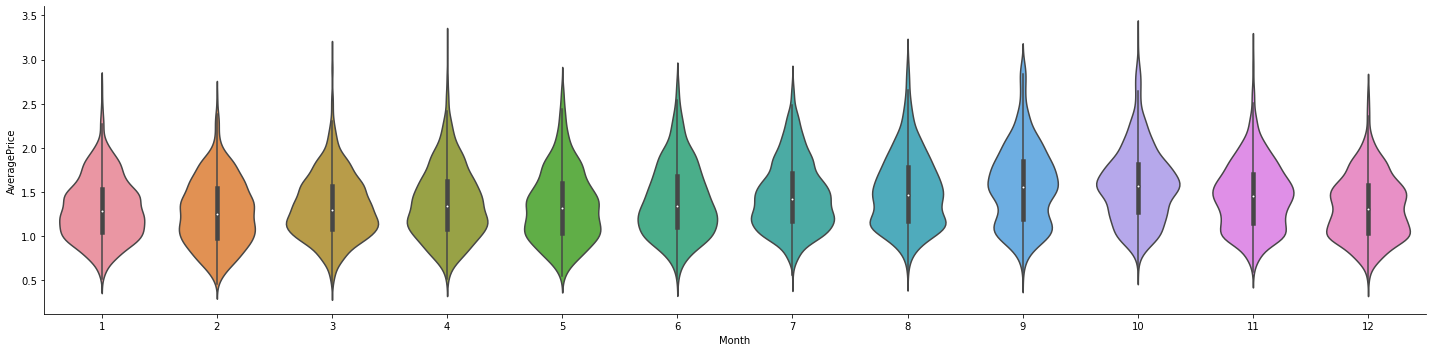

In [63]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=data, aspect=4)
plt.show()

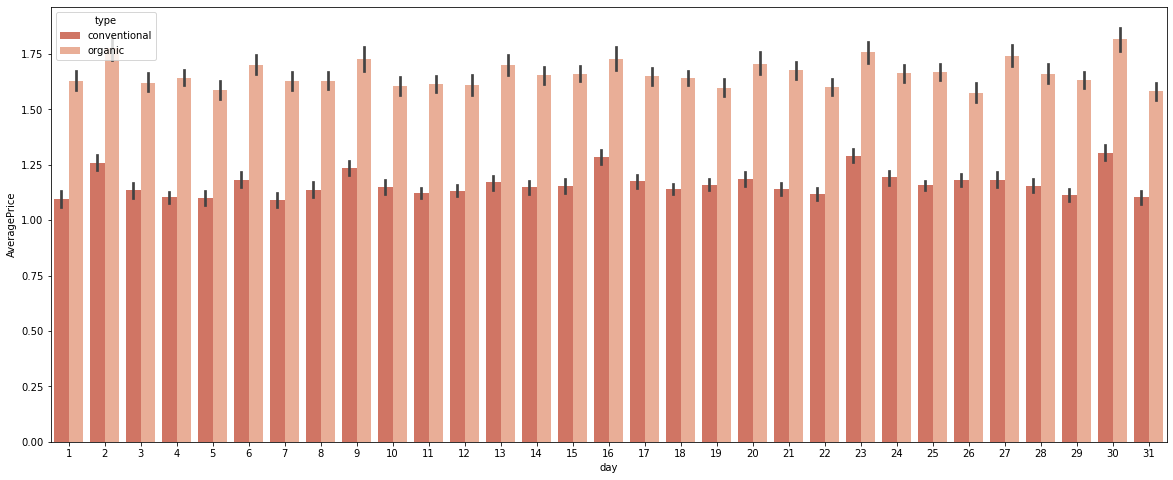

In [64]:
plt.figure(figsize=(20,8))
sns.barplot(x='day', y='AveragePrice', hue='type',data=data)
plt.show()


<Figure size 1440x720 with 0 Axes>

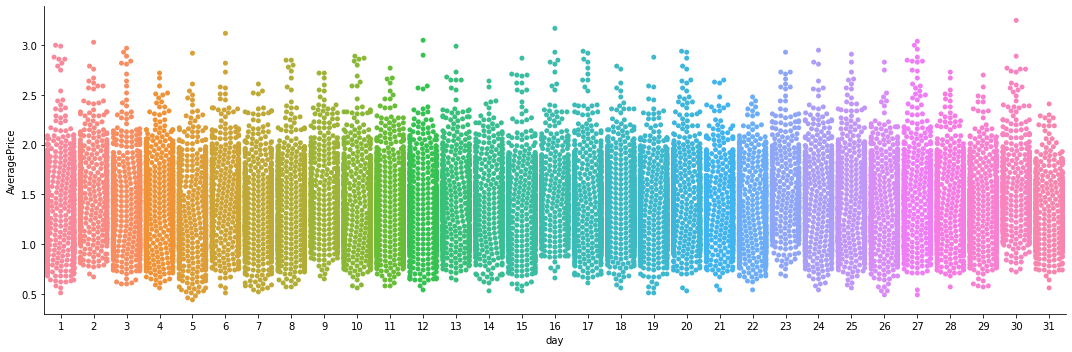

In [65]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='swarm', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

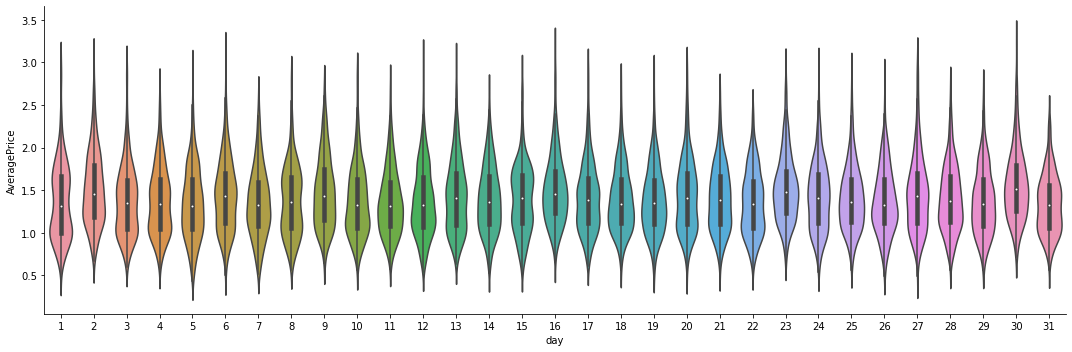

In [66]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='violin', data=data, aspect=3)
plt.show()

In [67]:
# Observations:

# For every month the sell of conventional avocado is greater than organic.

# For 8th, 9th and 10th month the price is high and in this time the sales are minimum.

# For 1st, 2nd and 3rd month the price is low and in this time the sales are maximum.

# For every day also, the sell of conventional avocado is greater than organic.

# Analysis of other features:


In [68]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='type'>

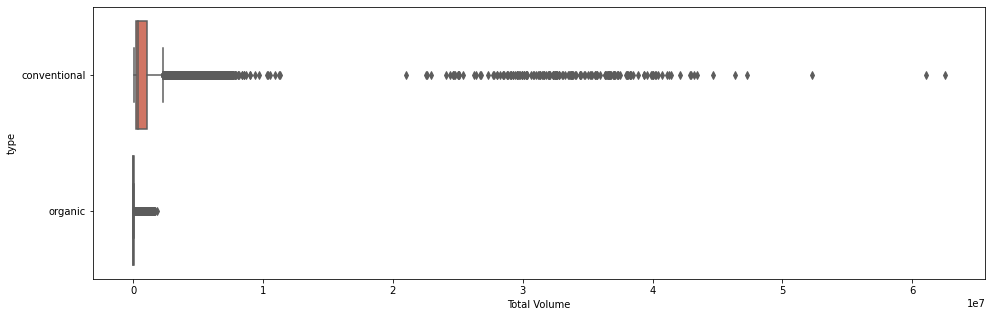

In [69]:
plt.figure(figsize=(16,5))
sns.boxplot(y="type", x="Total Volume", data=data)

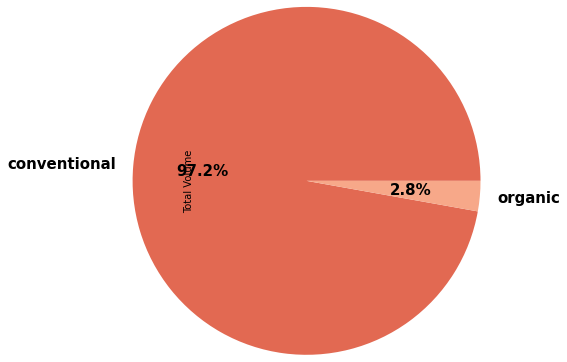

In [70]:
data.groupby('type')['Total Volume'].mean().plot.pie(radius =2, textprops ={'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

In [71]:
#Observations:

# 97% are conventional avocado.The volume of conventional is greater for every region wise data.

# outliers are present in both types of avocado data

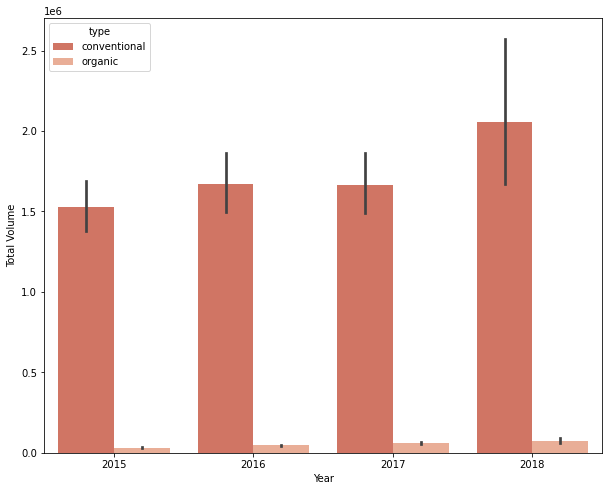

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x='Year', y='Total Volume', hue='type',data=data)
plt.show()

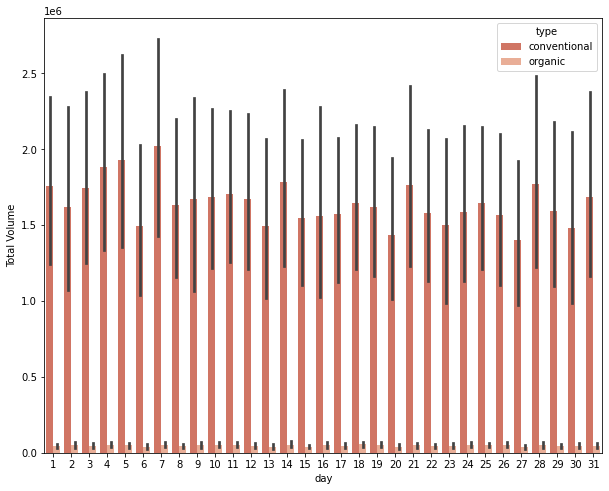

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x='day', y='Total Volume', hue='type',data=data)
plt.show()

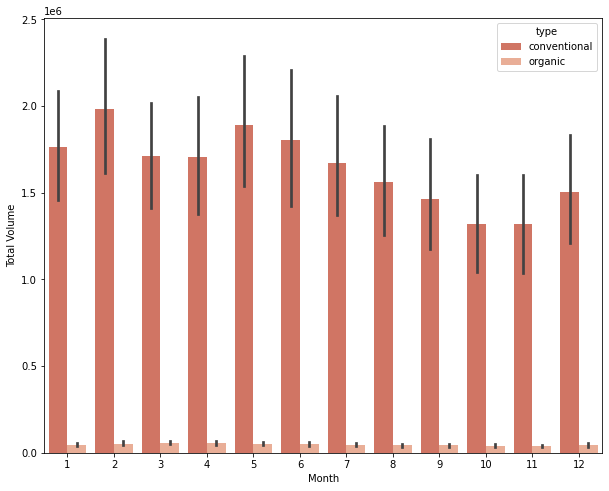

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='Total Volume', hue='type',data=data)
plt.show()

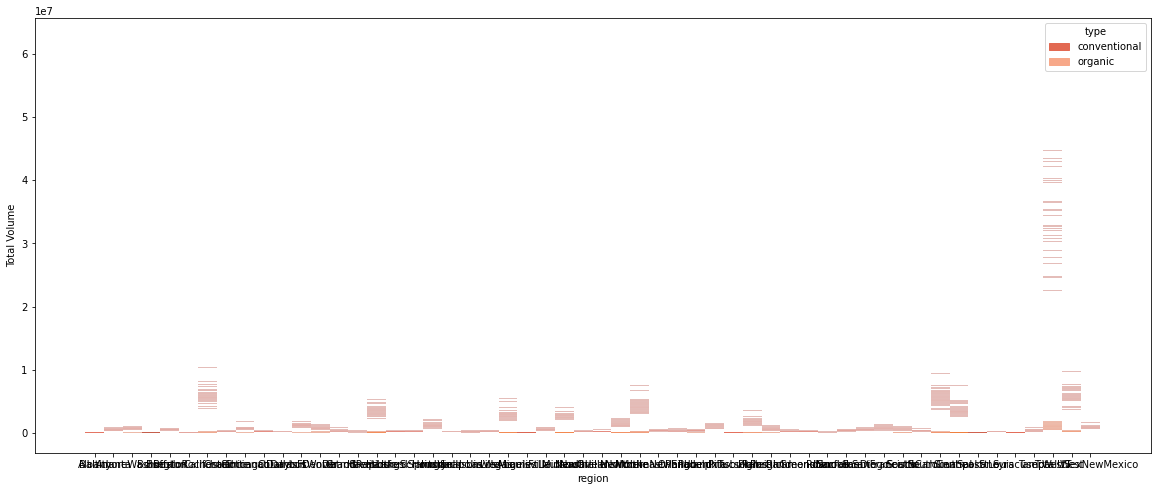

In [75]:
plt.figure(figsize=(20,8))
sns.histplot(x='region', y='Total Volume', hue='type',data=data)
plt.show()

In [76]:
# Observations:

# volume of avocado is highest for yr 2018

# the volume of organic avocado increased gradually w.r. to year

# volume of avocado mainly high for the 4th to 7th day of the months

# volume of avocado is highest for 2nd month

<Figure size 1440x720 with 0 Axes>

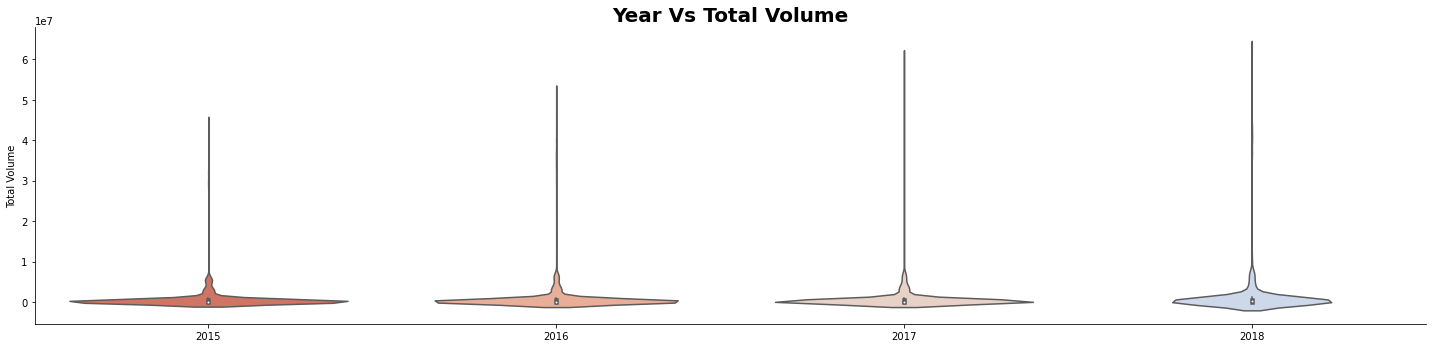

In [77]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'Year',y ='Total Volume',kind = 'violin',data = data, aspect=4)
plt.xlabel("",fontsize=20)
plt.title("Year Vs Total Volume", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

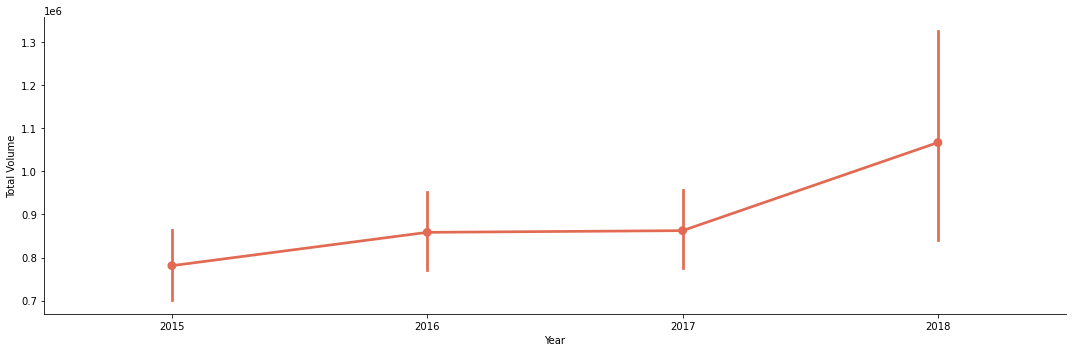

In [78]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Year", y = "Total Volume", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

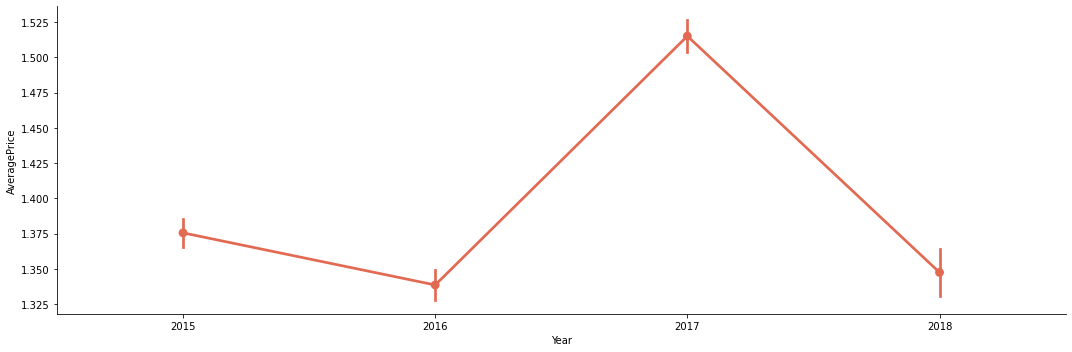

In [79]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Year", y = "AveragePrice", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

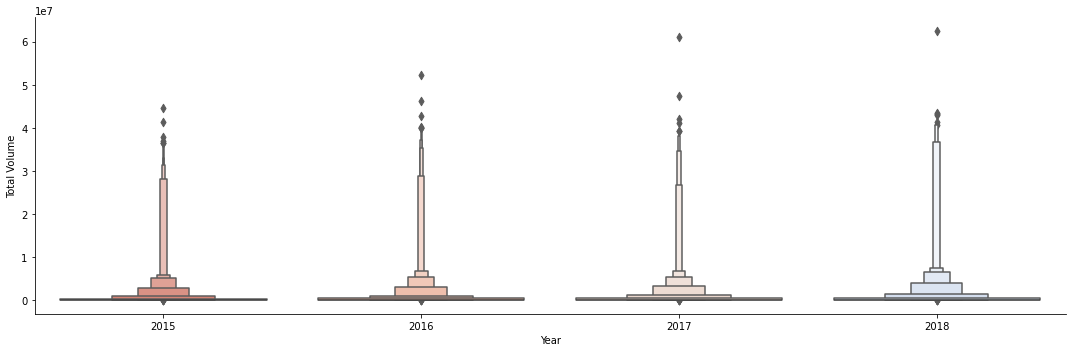

In [80]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Year", y = "Total Volume", kind ='boxen', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

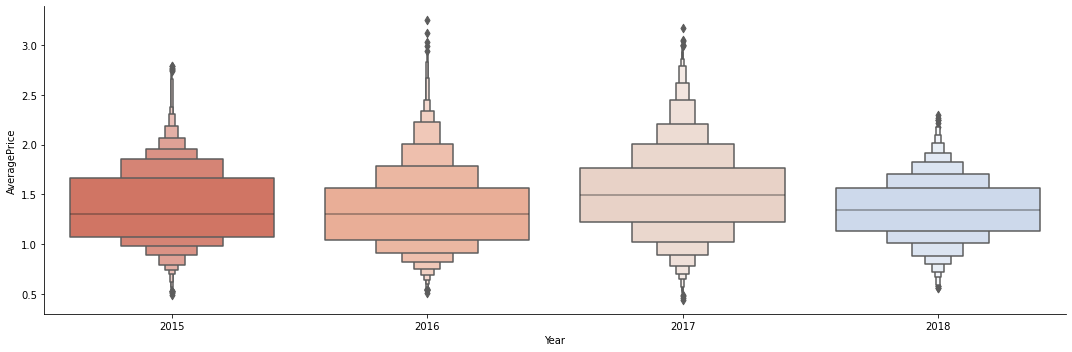

In [81]:
plt.figure(figsize=(20,10))
sns.catplot(x = "Year", y = "AveragePrice", kind ='boxen', data=data, aspect=3)
plt.show()

In [82]:
# Observation

# Outliers are present in every years

# the price is low for year 2018 , the sale is comparatively high

# we can see that, sale is affected by price.

In [83]:
data.groupby(['Year','type'])['AveragePrice'].agg([min,max,sum])

min   max      sum
Year type                             
2015 conventional  0.49  1.59  3026.92
     organic       0.81  2.79  4697.02
2016 conventional  0.51  2.20  3104.51
     organic       0.58  3.25  4413.29
2017 conventional  0.46  2.22  3705.97
     organic       0.44  3.17  4963.59
2018 conventional  0.56  1.74   730.87
     organic       1.01  2.30  1015.53

In [84]:
data.groupby(['Year','type'])['Total Volume'].agg([min,max,sum])

min          max           sum
Year type                                             
2015 conventional  35852.68  44655461.51  4.296599e+09
     organic          84.56    912681.57  8.886943e+07
2016 conventional  33699.68  52288697.89  4.690250e+09
     organic         385.55   1475457.53  1.306401e+08
2017 conventional  43715.52  61034457.10  4.766166e+09
     organic         515.01   1634877.11  1.681399e+08
2018 conventional  65757.32  62505646.52  1.334206e+09
     organic        2064.90   1814929.97  4.853227e+07

In [85]:
data.groupby(['Year','type'])['Large Bags'].agg([min,max,sum])

min         max           sum
Year type                                         
2015 conventional   0.00  1371440.28  1.231692e+08
     organic        0.00   148734.45  8.897192e+06
2016 conventional   0.00  3373077.87  3.136371e+08
     organic        0.00   325375.97  2.298920e+07
2017 conventional   0.00  4324231.19  3.713655e+08
     organic        0.00   561530.39  2.797352e+07
2018 conventional  80.08  5719096.61  1.177311e+08
     organic        0.00   267818.31  5.852903e+06

In [86]:
data.groupby(['Year','type'])['XLarge Bags'].agg([min,max,sum])

min        max          sum
Year type                                     
2015 conventional  0.0  199305.12   5443128.28
     organic       0.0       0.00         0.00
2016 conventional  0.0  551693.65  20038284.84
     organic       0.0       0.00         0.00
2017 conventional  0.0  377661.06  23991658.41
     organic       0.0     265.79      5513.93
2018 conventional  0.0  309467.53   7205184.07
     organic       0.0     510.41      5407.80

In [87]:
data.groupby(['Year'])['XLarge Bags'].agg([min,max,sum])

min        max          sum
Year                             
2015  0.0  199305.12   5443128.28
2016  0.0  551693.65  20038284.84
2017  0.0  377661.06  23997172.34
2018  0.0  309467.53   7210591.87

In [88]:
# Observations:

# XLarge_bags sales increased rapidly in 2018 compare to 2015.

# Large_Bags sales also increased rapidly in 2018 compare to 2015.

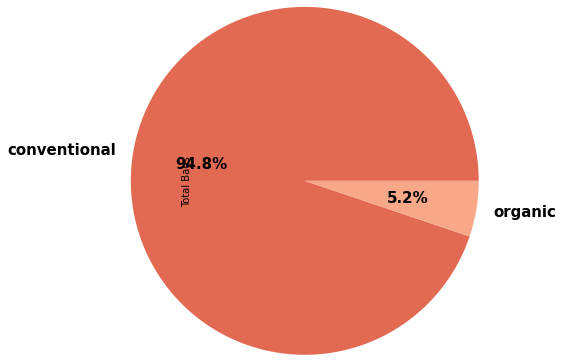

In [89]:
data.groupby('type')['Total Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()


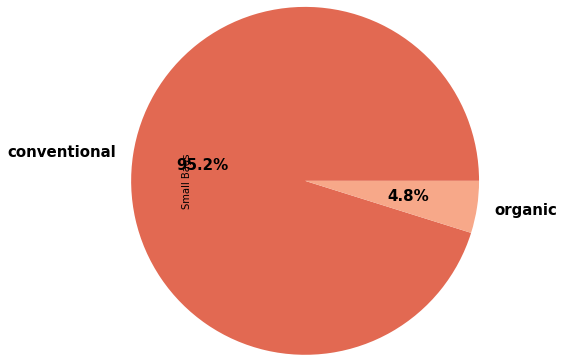

In [90]:
data.groupby('type')['Small Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

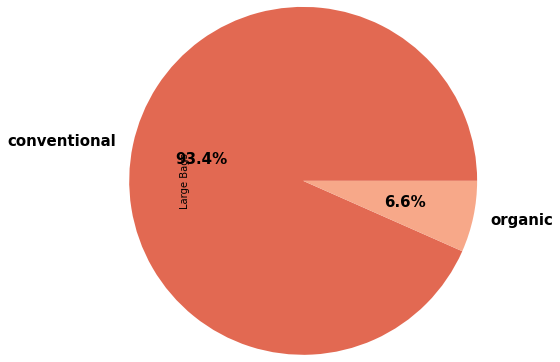

In [91]:
data.groupby('type')['Large Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()


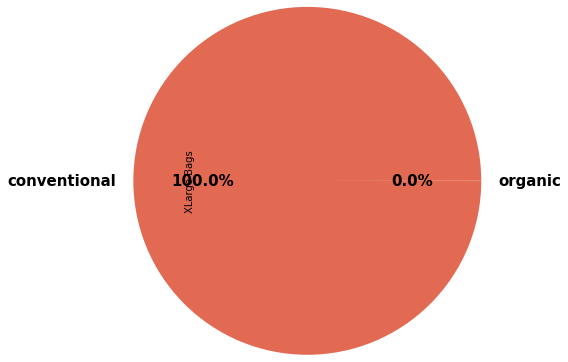

In [92]:
data.groupby('type')['XLarge Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

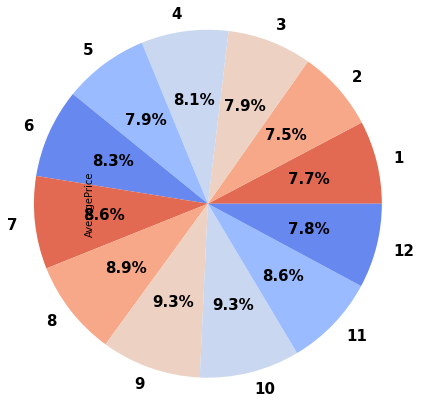

In [93]:
data.groupby('Month')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

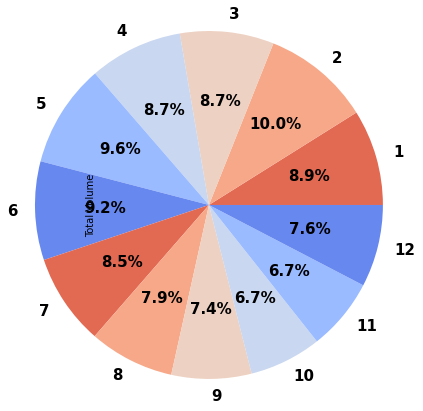

In [94]:
data.groupby('Month')['Total Volume'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()


In [95]:
# Observations:

# For Total bags the conventional avocado percentage is 94.8%

# For Small Bags the conventional avocado percentage is 95.2%

# For Large Bags the conventional avocado percentage is 93.4%

# For XLarge Bags the conventional avocado percentage is 100%, there is no organic avocado.

# Mainly conventional avocado is the best selling and cheaper avocado

# for 9th and 10th month, price is high and sale is low.


# EDA
Univariate analysis:

In [96]:
data_new =data.copy()

In [97]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

In [98]:
# Creating Datframe for numeric features
data.drop(['type','region','Year'], axis=1, inplace=True)

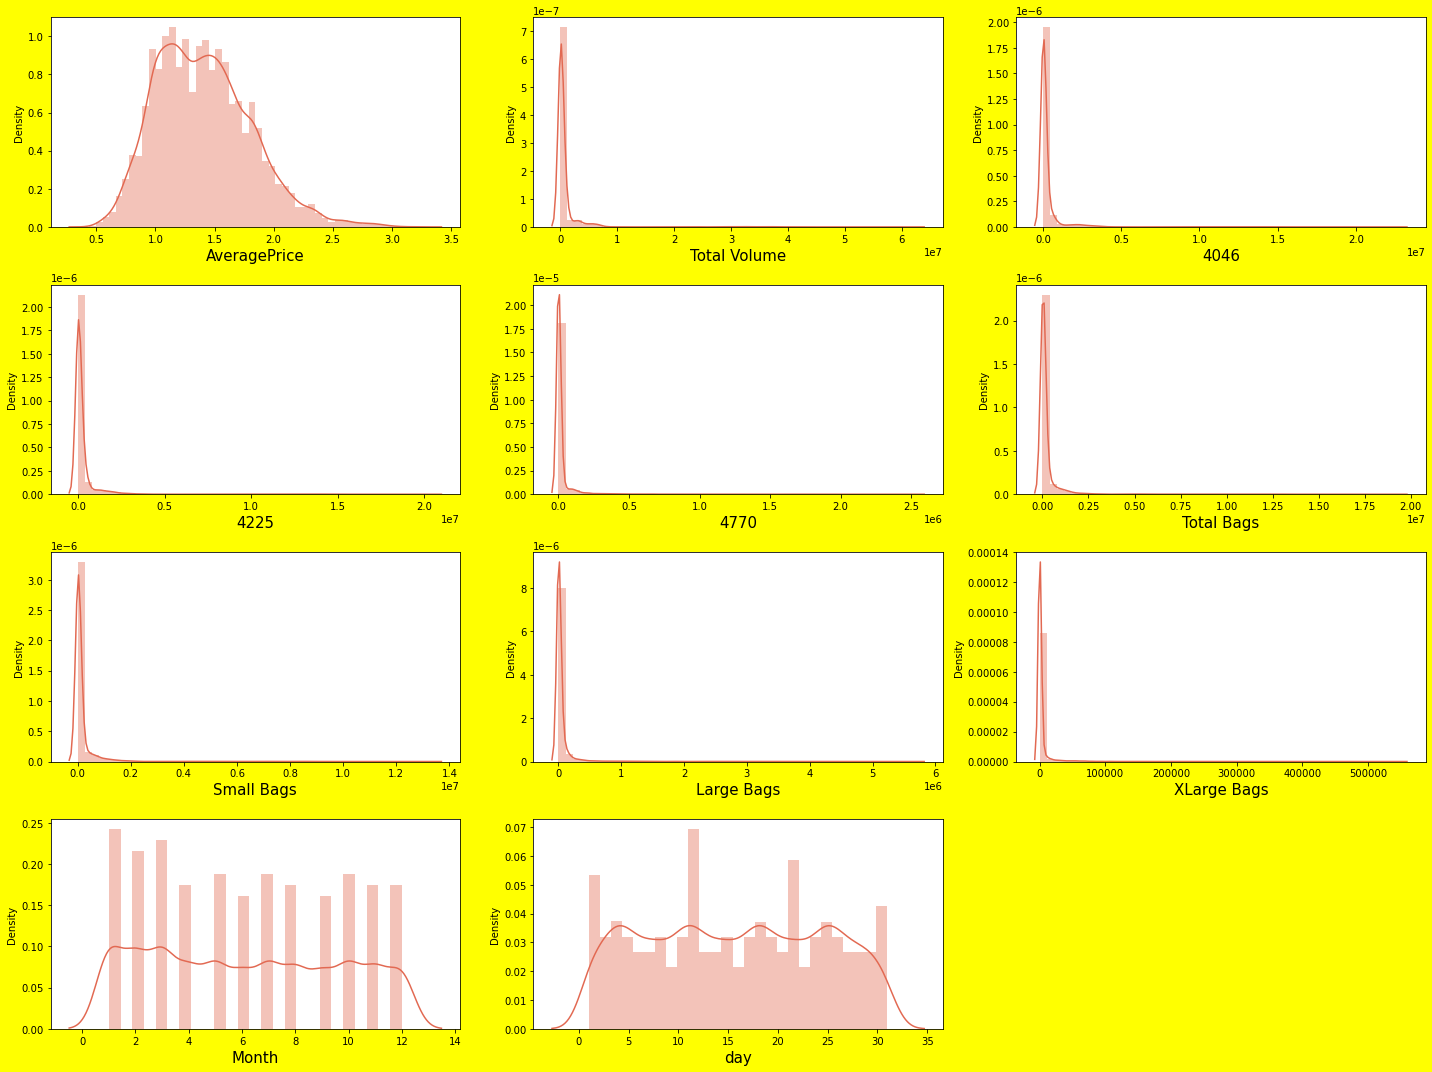

In [99]:
plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

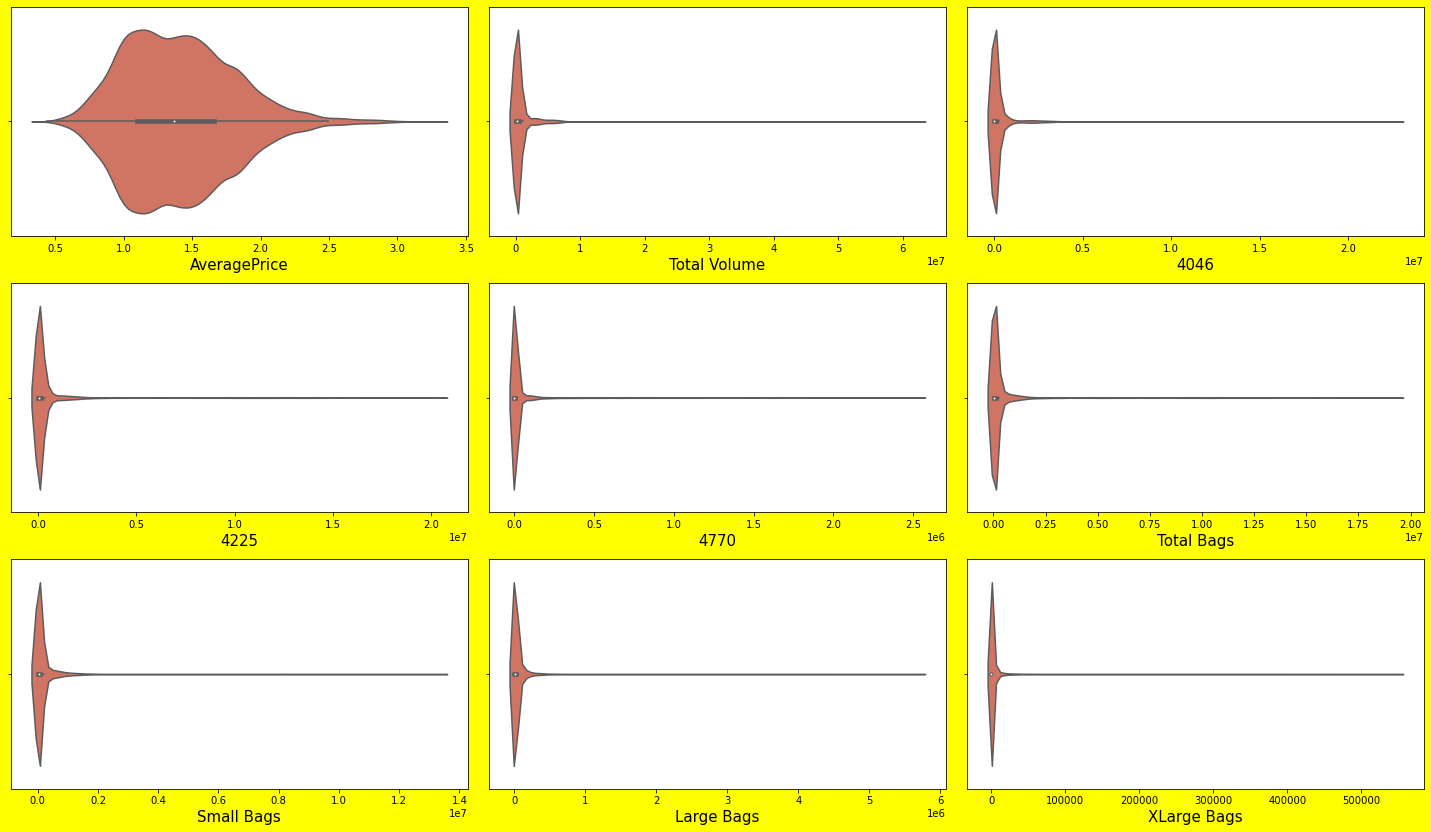

In [100]:
data_new1 =data.copy()
# Creating Datframe for numeric features
data.drop(['day','Month'], axis=1, inplace=True)

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

In [101]:
# Observations:

# Average price is in between 1-2

# For every features,outliers with sharp peak is present.

# Mainly all features are right skewed.

# seems outliers are present

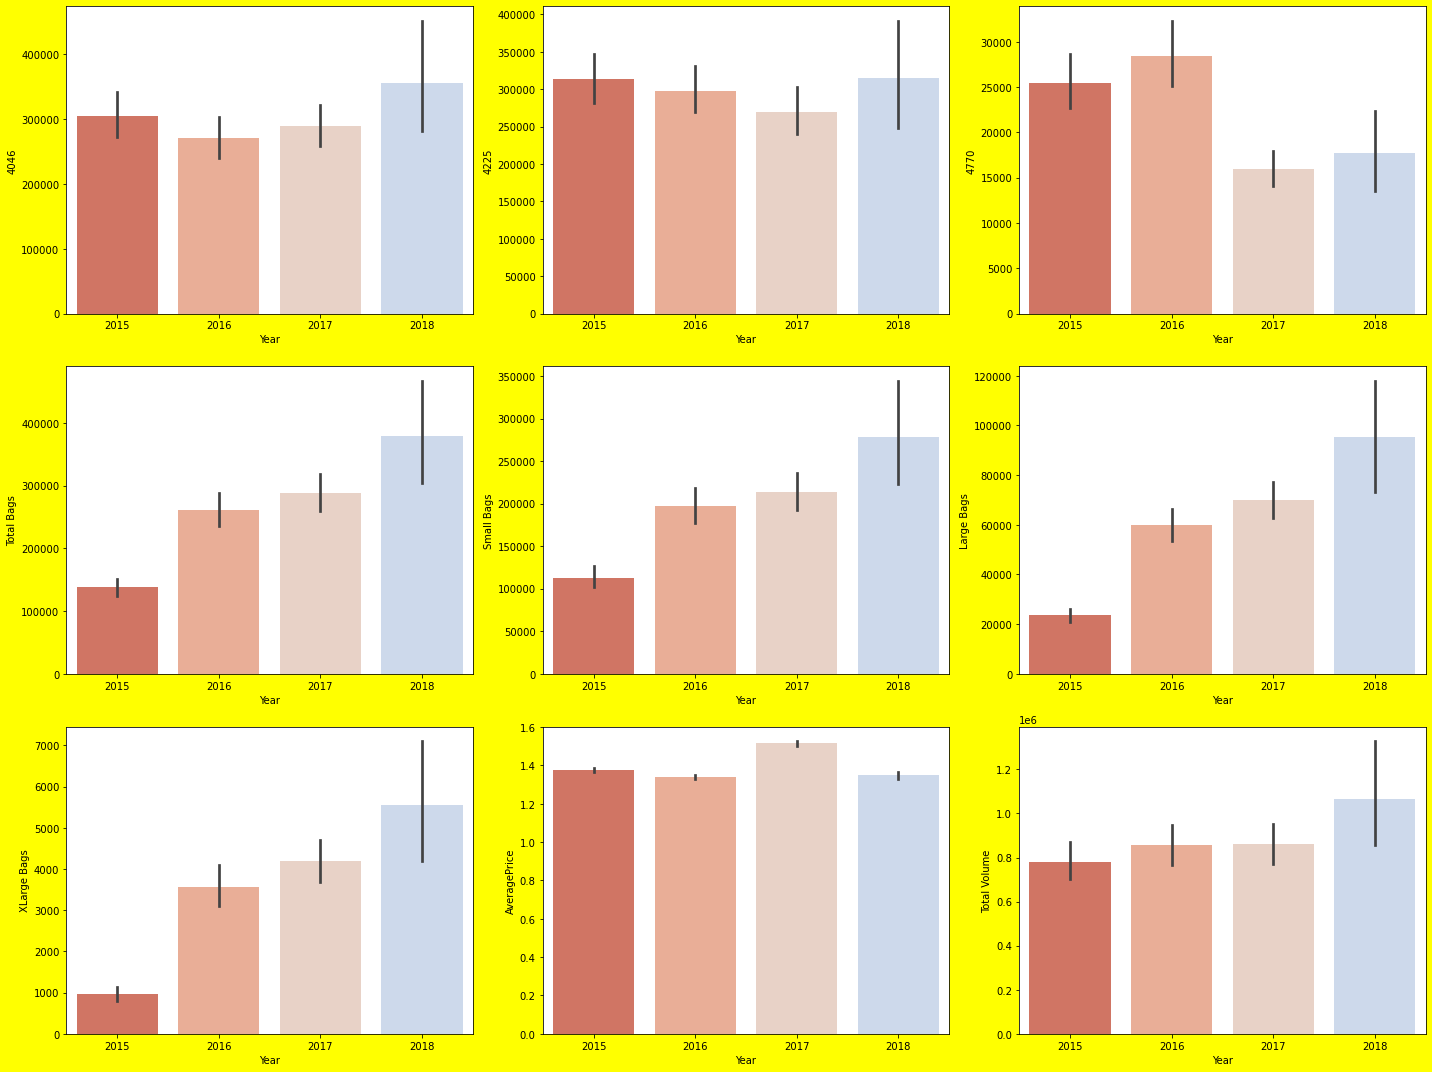

In [102]:
y = data_new[['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice', 'Total Volume']]
x = data_new['Year']

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for i in y:
    if plno<=9:
        plt.subplot(3,3,plno)
        sns.barplot(x,y[i])
    plno +=1
plt.tight_layout()

In [103]:
# Observations:

# Sale of all 3 types of bags is increased gradually in every year and max in 2018

# For 3 types of bags the sale of small bag is max for evey year.

# For 3 types of bags the sale of XLarge bag is min for evey year.

# As earlier, the price is low and the sale is high for year 2018.


# Multivariate Analysis

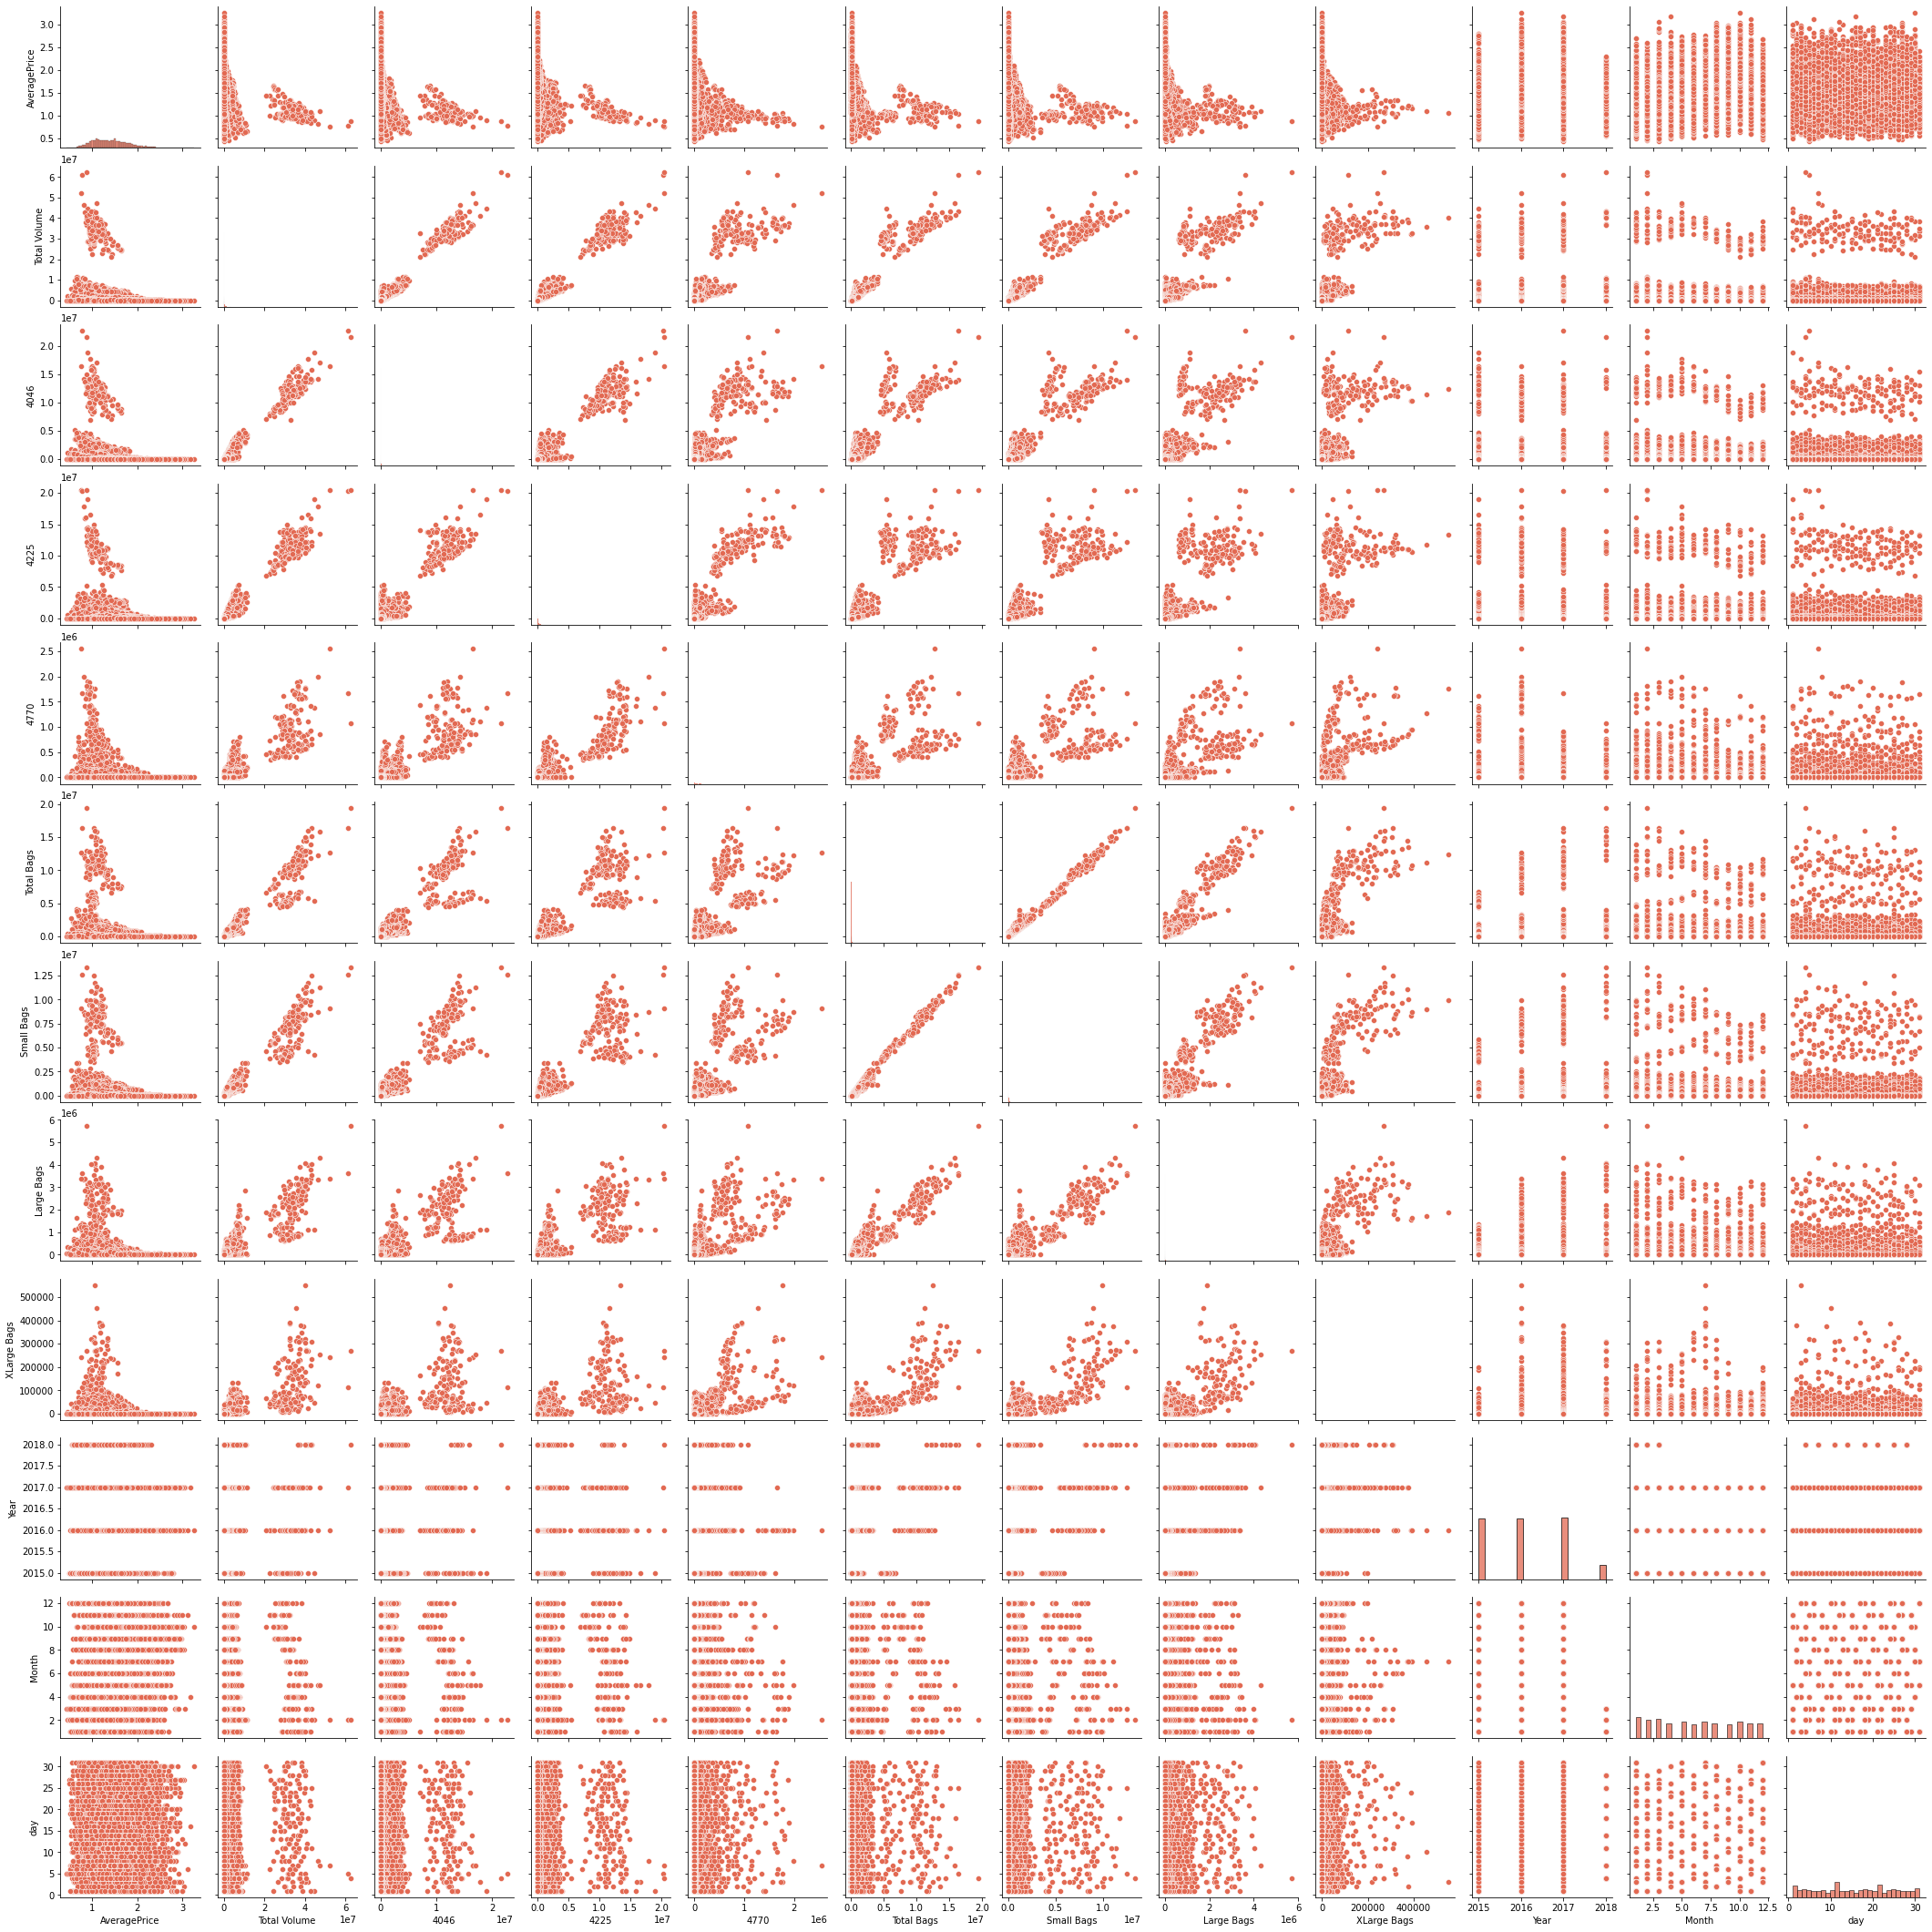

In [104]:
sns.pairplot(data_new)
plt.show()

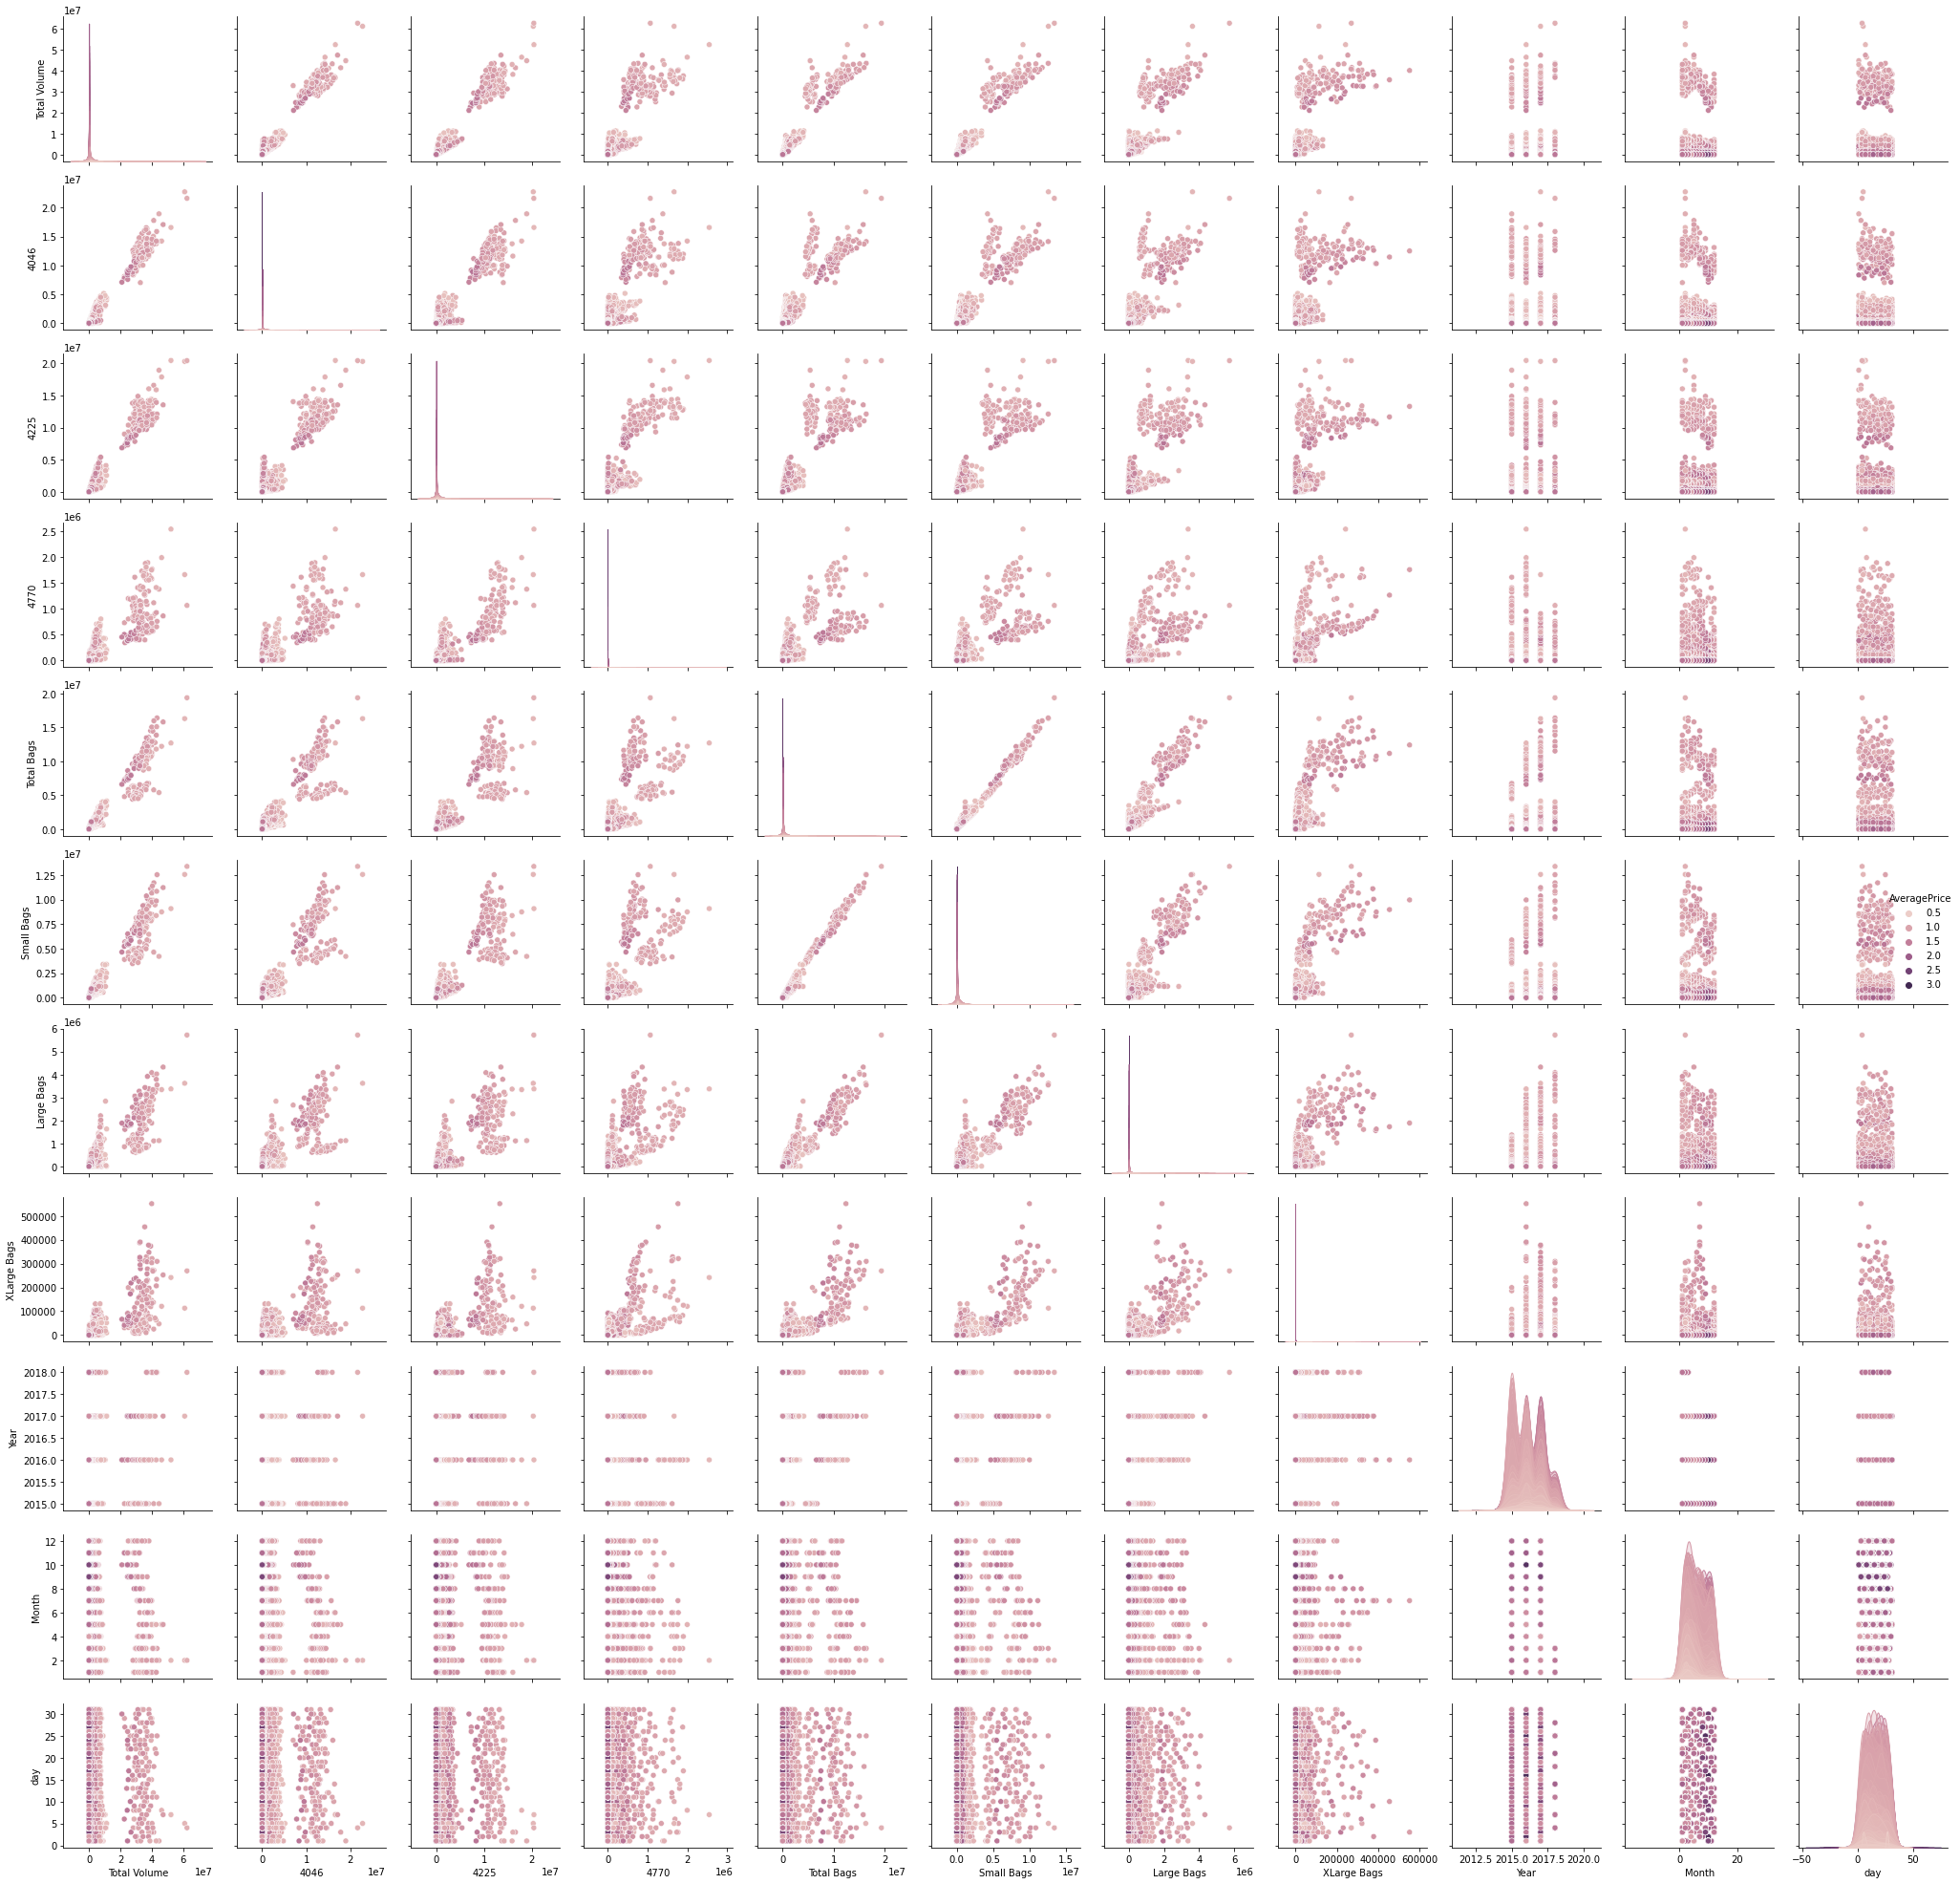

In [105]:
sns.pairplot(data_new, hue= "AveragePrice", kind= 'scatter')
plt.tight_layout()
plt.show()

# Correlations:

In [106]:
data_new.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
Year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      Year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
4046            0.920057    0.925280    0.838645     0.699377  0.003353   
4225            0.905787    0.916031    0.810015     0.688809 -0.009559   
4770            0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
Year            0.071552    0.063915    0.087891     0.081033  1.000000   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.177050   
day            -0.004988   -0.003870   -0.008352     0.000319  0.004475   

                 Month       day  
AveragePrice  0.162409  0.027386  
Total Volume -0.024689 -0.009747  
4046         -0.025803 -0.010159  
4225         -0.022108 -0.012393  
4770         -0.033424 -0.009009  
Total Bags   -0.022724 -0.004988  
Small Bags   -0.023126 -0.003870  
Large Bags   -0.020187 -0.008352  
XLarge Bags  -0.012969  0.000319  
Year         -0.177050  0.004475  
Month         1.000000  0.010621  
day           0.010621  1.000000

In [107]:
a= data_new.corr()['AveragePrice'].drop(['AveragePrice'])
a

Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
Year            0.093197
Month           0.162409
day             0.027386
Name: AveragePrice, dtype: float64

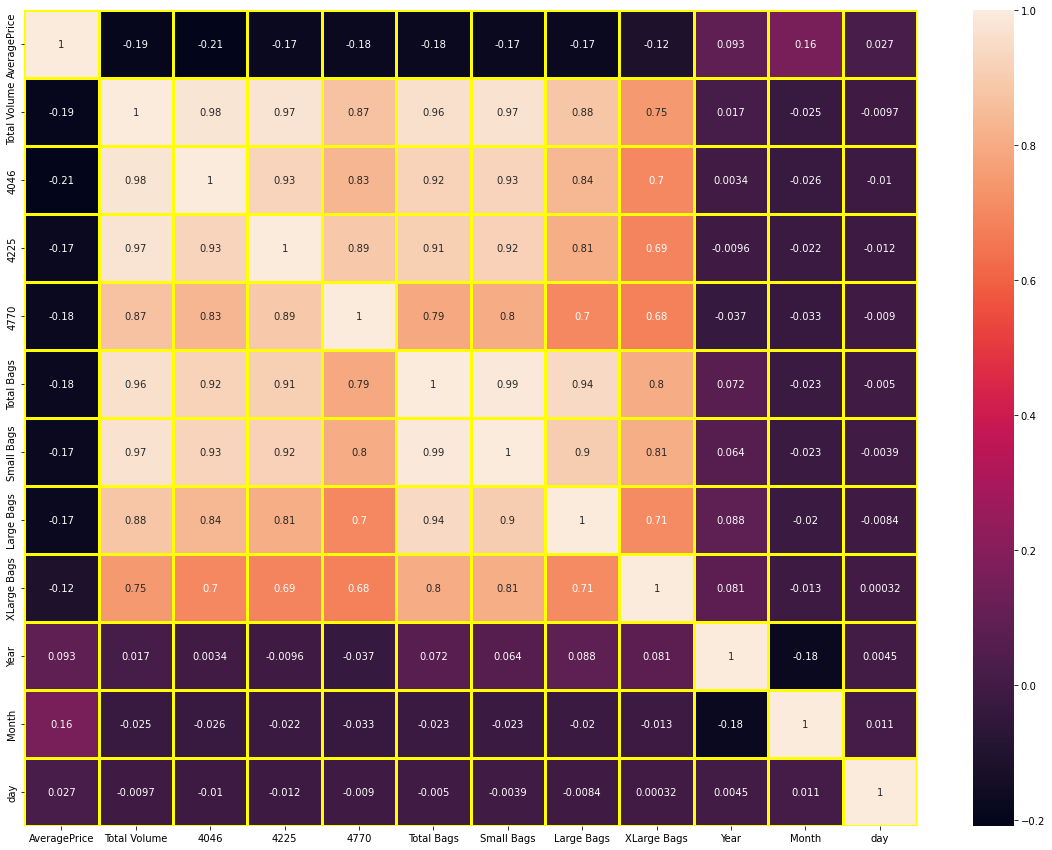

In [108]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

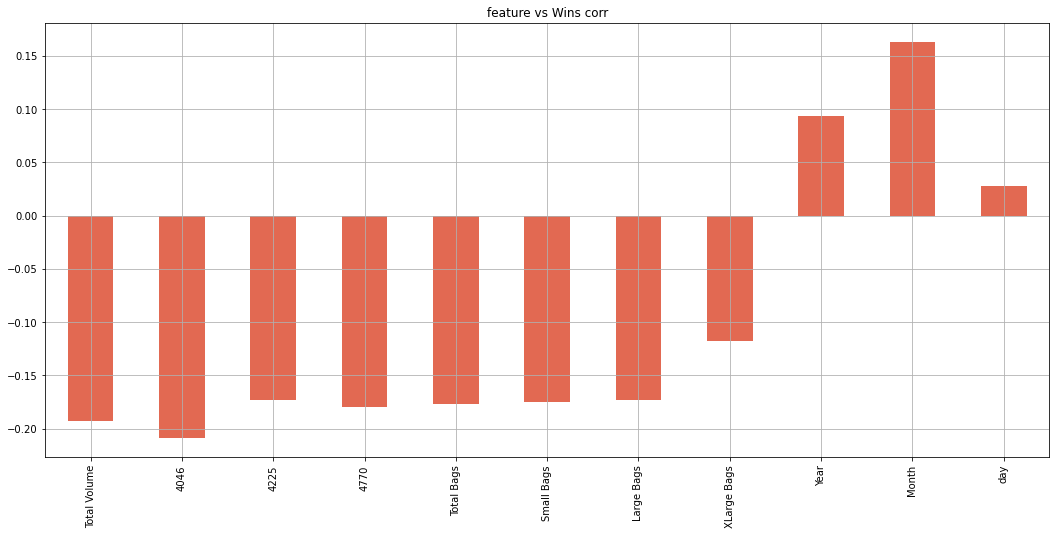

In [109]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

In [110]:
# Observations:

# '4046', '4225', '4770' are highly correlated with Total_Volume.

# Small bags are highly correlated with Total Bags correlation coeffient 0.99, this means that most of bags are small.

# Almost all features except year are highly negatively correlated with the target variable.


# Encoding categorical data:

In [111]:
# Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new['region']=le.fit_transform(data_new['region'])
data_new['type']=le.fit_transform(data_new['type'])
data_new.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  day  
0     8603.62       93.25          0.0     0       0  2015     12   27  
1     9408.07       97.49          0.0     0       0  2015     12   20  
2     8042.21      103.14          0.0     0       0  2015     12   13  
3     5677.40      133.76          0.0     0       0  2015     12    6  
4     5986.26      197.69          0.0     0       0  2015     11   29

In [112]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  region        18249 non-null  int64  
 11  Year          18249 non-null  int64  
 12  Month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 1.9 MB


In [113]:
data_new.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  day  
0     8603.62       93.25          0.0     0       0  2015     12   27  
1     9408.07       97.49          0.0     0       0  2015     12   20  
2     8042.21      103.14          0.0     0       0  2015     12   13  
3     5677.40      133.76          0.0     0       0  2015     12    6  
4     5986.26      197.69          0.0     0       0  2015     11   29

In [114]:
# Observation:

# Encoding of region and type is done

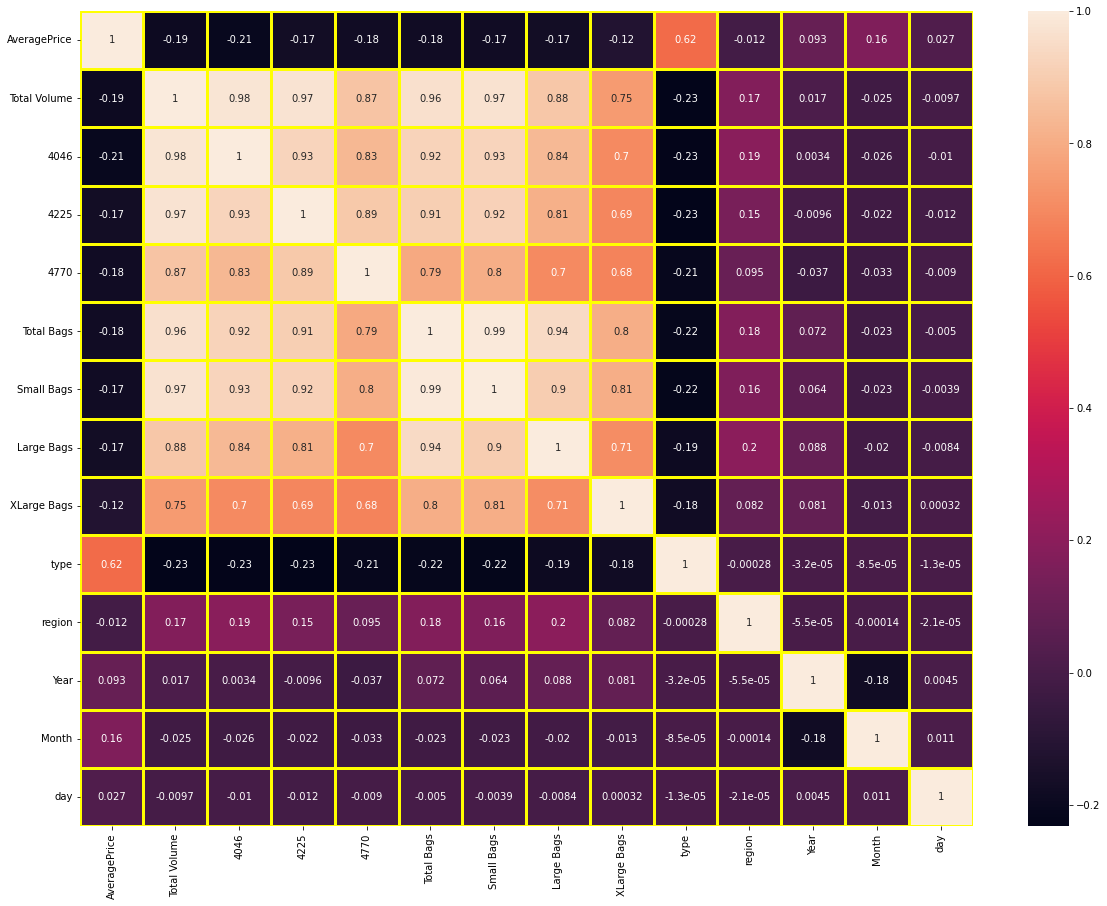

In [115]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

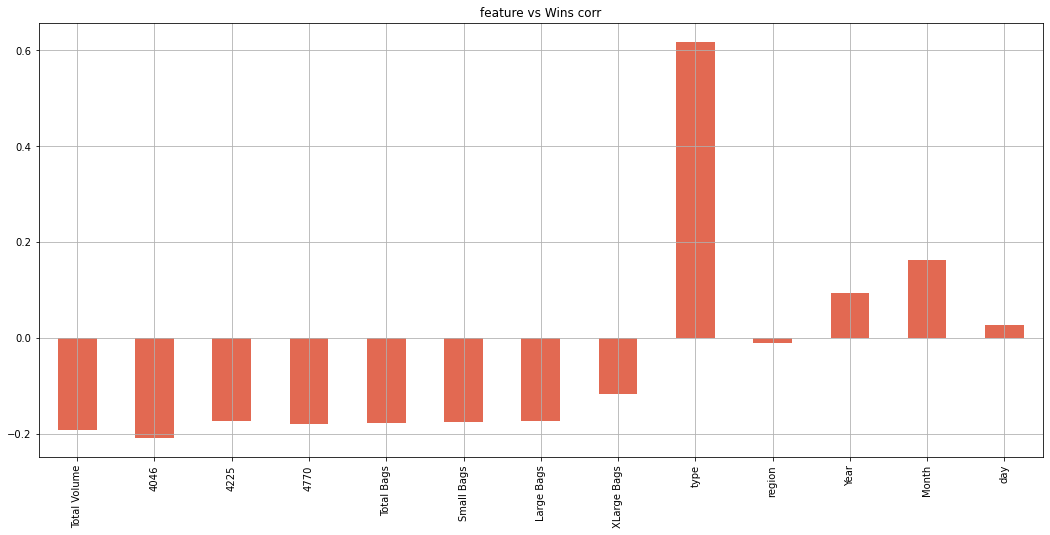

In [116]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

In [117]:
# Observations:

# After encoding type is also positively correlatd with target

# Outliers Detection and Removal:

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
region                AxesSubplot(0.125,0.125;0.133621x0.222059)
Year               AxesSubplot(0.285345,0.125;0.133621x0.222059)
Month               AxesSubplot(0.44569,0.125;0.133621x0.222059)
day                AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

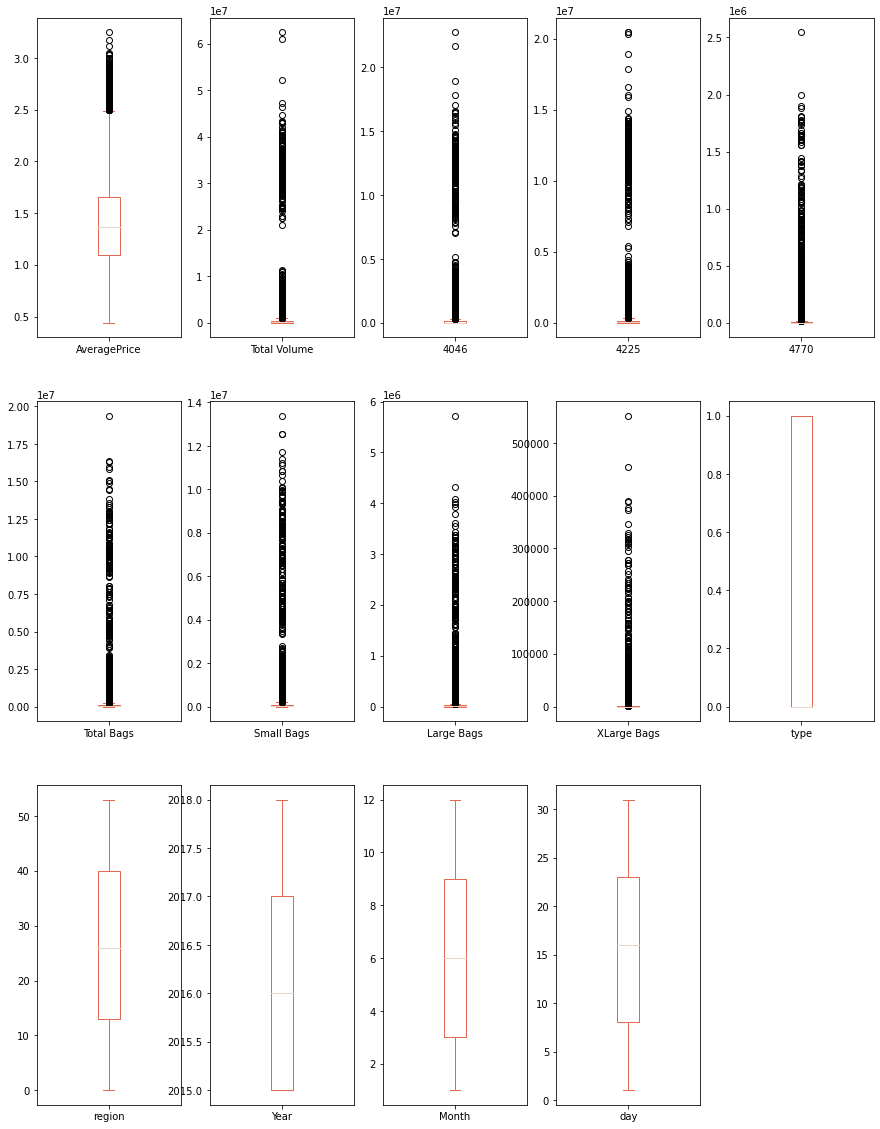

In [118]:
data_new.plot(kind ='box', subplots =True , layout =(3,5), figsize = (15,20))

In [119]:
# From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.

# Using Z score method:

In [120]:
from scipy.stats import zscore
z = np.abs(zscore(data_new))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([2, 2, 8, ..., 0, 0, 0]))


In [121]:
data_new1 = data_new[(z<3).all(axis = 1)]
data_new1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  day  
0     8603.62       93.25          0.0     0       0  2015     12   27  
1     9408.07       97.49          0.0     0       0  2015     12   20  
2     8042.21      103.14          0.0     0       0  2015     12   13  
3     5677.40      133.76          0.0     0       0  2015     12    6  
4     5986.26      197.69          0.0     0       0  2015     11   29

In [122]:
data_new1.shape

(17651, 14)

In [123]:
data_new.shape

(18249, 14)

In [124]:
# Observations:
# the data loss= (18249-17651)= 598 datapoints

# Checking Multicollinearity:

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data_new1.values,i)for i in range(data_new1.shape[1])]
vif["Features"] = data_new1.columns
vif

VIF      Features
0   2.499139e+01  AveragePrice
1   4.977395e+08  Total Volume
2   8.727666e+07          4046
3   7.504348e+07          4225
4   5.281429e+05          4770
5   2.333471e+13    Total Bags
6   1.518921e+13    Small Bags
7   1.478286e+12    Large Bags
8   7.092970e+09   XLarge Bags
9   3.729001e+00          type
10  4.114701e+00        region
11  2.542391e+01          Year
12  4.218813e+00         Month
13  4.203526e+00           day

In [126]:
# Observations:

# Here '4046','4225','4770', 'Total_Bags' is very poorly correlated(negetive correlation) with label.

# Lets drop the features

In [127]:
df1= data_new1.copy()

In [128]:
df1.drop(columns=['4046','4225','4770', 'Total Bags'],axis=1, inplace=True)

In [129]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  24.391858  AveragePrice
1   7.758703  Total Volume
2   7.713459    Small Bags
3   1.989704    Large Bags
4   1.707791   XLarge Bags
5   3.651418          type
6   3.986725        region
7  25.116718          Year
8   4.212384         Month
9   4.202566           day

In [130]:
# As for all feature VIF is within 10 except year. Let's drop it

In [131]:
df1.drop(columns=['Year'],axis=1, inplace=True)

In [132]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  11.529098  AveragePrice
1   7.622556  Total Volume
2   7.694569    Small Bags
3   1.983616    Large Bags
4   1.707415   XLarge Bags
5   3.510587          type
6   3.589139        region
7   4.043740         Month
8   3.743035           day

In [133]:
# Looks good now all are withn 10

# Checking Skewness:

In [134]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Month           0.107408
day             0.011778
dtype: float64

In [135]:
# Observations:

# The standard range for skewness is between -0.5 to 0.5.

# Total Volume, Small Bags, Large Bags, XLarge Bags are positively skewed in nature, need to transform.

# Let's transform all the positive skewed data using log transformation:

In [136]:
df_new= df1.copy()

In [137]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Total Volume', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_new[features]= scaler.fit_transform(df_new[features].values)
df_new[features].head()

Total Volume  Small Bags  Large Bags  XLarge Bags
0     -0.075324   -0.347421   -0.781153    -0.677919
1     -0.147497   -0.311322   -0.771198    -0.677919
2      0.205556   -0.374453   -0.758523    -0.677919
3      0.019655   -0.510991   -0.699123    -0.677919
4     -0.180674   -0.490534   -0.607027    -0.677919

In [138]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
region          0.012798
Month           0.107408
day             0.011778
dtype: float64

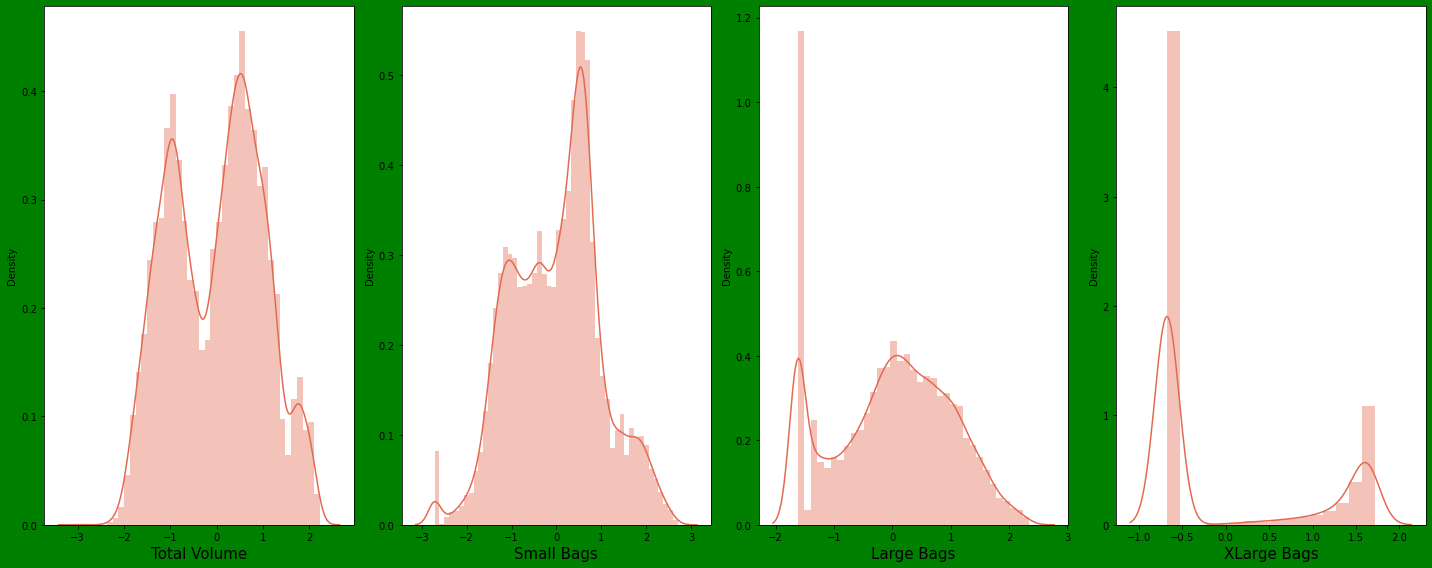

In [139]:
plt.figure(figsize=(20,8),facecolor='green')
plno=1
for x in df_new[features]:
    if plno<=4:
        plt.subplot(1,4,plno)
        sns.distplot(df_new[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

In [140]:
# Observations:

# All skewness are removed from the whole dataset But, XL bags are still skewed,
#But its ok, let's proceed to next step

# Standard Scaling

In [141]:
x = df_new.drop('AveragePrice', axis=1)
y = df_new['AveragePrice']

In [142]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

# Final predictions using different Regression ML Models:


In [143]:
# Find best Random state:

from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.47387291721293767 on Random_state 449


In [144]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (13238, 8)
Training target shape: (13238,)
Test feature shape: (4413, 8)
Test target shape: (4413,)


In [145]:
# Observations:

# For random state=449, the accuracy score is best. Lets take this random state for further steps.



# Using LinearRegression()

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=449)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.47387291721293767
Mean absolute error: 0.2233615338223314
Mean square error: 0.07988693697524349
Root mean square error: 0.2826427727277729


# Using GridSearchCV:

In [147]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [148]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.47387291721293767
Mean absolute error: 0.2233615338223314
Mean square error: 0.07988693697524349
Root mean square error: 0.2826427727277729


In [149]:
# Observations

# No such improvement seen after GridSearchCV.

# Using DecisionTreeRegressor():

In [150]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6728176562936588
Mean absolute error: 0.15190346702923183
Mean square error: 0.049679243145252655
Root mean square error: 0.22288840962520384


# Using GridSearchCV:

In [151]:
param = {'criterion' : ["squared_error", "absolute_error"],
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'min_samples_leaf': 2, 'splitter': 'best'}


In [152]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6892488473976397
Mean absolute error: 0.15012954150615604
Mean square error: 0.04718433731147871
Root mean square error: 0.21721956014935376


In [153]:
# Observations:

# After using Grid seaech CV, R2 score is slightly increased

# Using KNeighborsRegressor():

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,18):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 0.31977661163780435
RMSE value for k=  2 is: 0.27335683204412187
RMSE value for k=  3 is: 0.2572829643710805
RMSE value for k=  4 is: 0.25256427645944934
RMSE value for k=  5 is: 0.24917632724148822
RMSE value for k=  6 is: 0.24796584761962473
RMSE value for k=  7 is: 0.2470674116427453
RMSE value for k=  8 is: 0.2468342788759078
RMSE value for k=  9 is: 0.24678794442797483
RMSE value for k=  10 is: 0.24598420957834943
RMSE value for k=  11 is: 0.24666724013360272
RMSE value for k=  12 is: 0.24658388901411088
RMSE value for k=  13 is: 0.2464920530709544
RMSE value for k=  14 is: 0.24717949383798715
RMSE value for k=  15 is: 0.24740382539219608
RMSE value for k=  16 is: 0.2477425247249733
RMSE value for k=  17 is: 0.2481008166626566
RMSE value for k=  18 is: 0.24839004384657767


In [155]:
min(rmse_val)

0.24598420957834943

In [156]:
# For k=10 we get the best RMSE value for KNeighborsRegressor()

In [157]:
knn =KNeighborsRegressor(n_neighbors= 10)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6014990628455456
Mean absolute error: 0.19346770904146837
Mean square error: 0.060508231361885344
Root mean square error: 0.24598420957834943


# Using GridSearchCV

In [158]:
param = {'algorithm' : ['auto','kd_tree', 'brute'],
             'leaf_size' : [30,40,10,],
             'n_neighbors' : [10],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}


In [159]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6084829376111631
Mean absolute error: 0.1911536650729788
Mean square error: 0.05944780246267643
Root mean square error: 0.2438192003568965


In [160]:
# Observations:

# After using gridsearch r2 score is slightly improved.

# Using RandomForestRegressor():

In [161]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8302221706100152
Mean absolute error: 0.11805461137548154
Mean square error: 0.025779001309766594
Root mean square error: 0.16055840466872667


# Using GridSearchCV:

In [163]:
params = {'n_estimators' : [100,150,80], 
          'min_samples_split' : [3,2,1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [164]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8307938065847137
Mean absolute error: 0.11815664039856877
Mean square error: 0.025692204319880403
Root mean square error: 0.1602878795164513


In [165]:
# Observations:

# r2 score slightly improved after GridSearchCV.

# Using Support Vector Regression():

In [166]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.6008950956447093
Mean absolute error: 0.1884901958521801
Mean square error: 0.06059993751290256


In [167]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.530898937390254
Mean absolute error: 0.20751212542280736
Mean square error: 0.07122812767061393


In [168]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.47343292629045075
Mean absolute error: 0.22176663082655967
Mean square error: 0.07995374503026358


# Using GridSearchCV:

In [169]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.1], 'kernel':['rbf']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [170]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6300242441804638
Mean absolute error: 0.18051203148543268
Mean square error: 0.0561769786321484
Root mean square error: 0.2370168319595644


In [171]:
# Observations:

# r2 score, RMSE are slightly improved after GridSearchCV.

# Using GradientBoostingRegressor()

In [172]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.675152577482869
Mean absolute error: 0.17209197086490766
Mean square error: 0.04932470959625439
Root mean square error: 0.22209166935356758


# Using GridSearchCV:

In [173]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,150,80],
          'min_samples_leaf':[1,2],
         'max_features': ['auto', 'sqrt']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'loss': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 150}


In [174]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7043074612740376
Mean absolute error: 0.16346652332581887
Mean square error: 0.04489784308406557
Root mean square error: 0.21189111138522437


In [175]:
# Observations:

# r2 score, RMSE are improved after GridSearchCV.



# Using AdaBoostRegressor():

In [176]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.48790901888346805
Mean absolute error: 0.22650363879313898
Mean square error: 0.07775570061388402
Root mean square error: 0.2788470918153604


# Using GridSearchCV:

In [177]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.01,1] ,
        'n_estimators':[50,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 40}


In [178]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5012447653656886
Mean absolute error: 0.2199674514980056
Mean square error: 0.07573080591905199
Root mean square error: 0.275192307158198


In [179]:
# Observations:


# r2 score, RMSE are slightly improved after GridSearchCV.

In [180]:
# As per 7 different regression model 

#we can see that the model with maximum R2 score and minimum RMSE value is RandomForest().

# Let's check the cross validation score before final prediction.




# Cross Validation:

In [181]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_svr_best, grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [-0.74580445 -0.03560123  0.46442719  0.03759221  0.07120993]

Mean CV Score : -0.04163527141432799

Std deviation : 0.3926833063264408

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(min_samples_leaf=2)

 Cross Validation Score :  [-2.03670594  0.0891897   0.13053882 -0.45185378 -0.19269506]

Mean CV Score : -0.4923052500807179

Std deviation : 0.8003308294940448

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=10, weights='distance')

 Cross Validation Score :  [-1.3842814  -0.05815982  0.40999266 -0.12369939  0.00428349]

Mean CV Score : -0.23037289033485836

Std deviation : 0.6062463361009248

-----------
-----------
Cross Validation Score of : RandomForestRegressor(min_samples_split=3, n_estimators=150)

 Cross Validation Score :  [-1.01662182  0.22726322  0.47368152 -0.04415749  0.06878866]

Mean CV Score : -0.058209184987587245

Std deviation 

# Checking overfitting problem:

In [182]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha 

0.00023281198461601397

In [183]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.4737799571869715


In [184]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.0021

In [185]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.4738729096682013


In [186]:
# Observations:

# After using LASSO() and Ridge(), there is no large change in score. So this model is not OVERFITTED.

# Conclusion:

# Our final model is RandomForestRegressor() for this particular dataset

# Final Model:

In [187]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([1.83012852, 1.18071032, 1.77452   , ..., 1.15815381, 2.05176175,
       1.07748984])

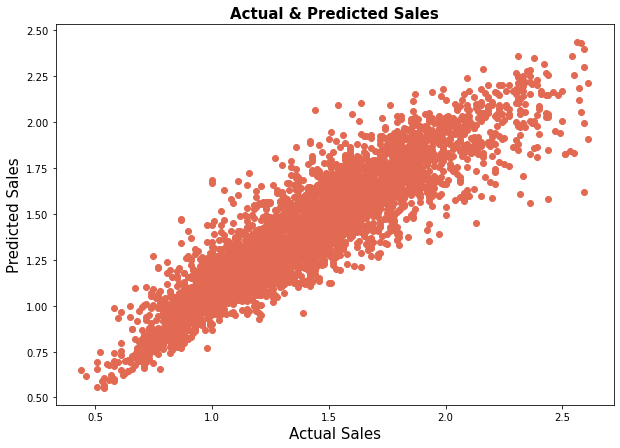

In [188]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [189]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.8307938065847137

Final Mean absolute error: 0.11815664039856877

Final Mean square error: 0.025692204319880403

Final Root mean square error: 0.1602878795164513


# Best contributing features among all features:

In [190]:
features= ['Total Volume', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'day', 'Month']
features


['Total Volume',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'region',
 'day',
 'Month']

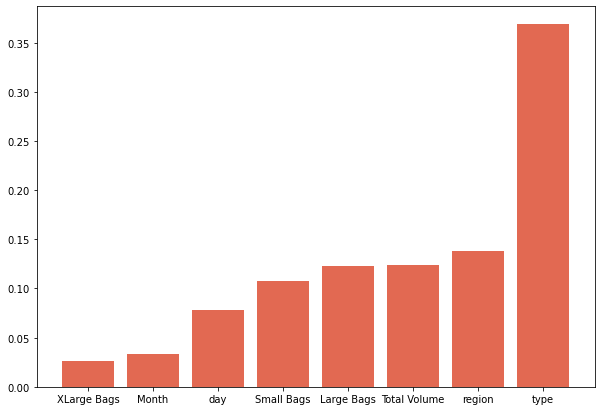

In [191]:
fimp = list(zip(features,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.bar([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()


# Observations:

In [192]:
# The best contributing feature name is 'type'

# Load and save the model


In [193]:
# Now , let's save the model for future use.

In [194]:
import pickle
pickle.dump(grid_rf_best, open("Avocado_Price_model", "wb"))
load_Avocado_Price_model= pickle.load(open("Avocado_Price_model", "rb"))

In [195]:
y_pred = load_Avocado_Price_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
4384          1.372470           1.16
2232          1.388692           1.42
1992          1.028230           0.97
94            1.965515           1.85
520           1.457449           1.62
2711          1.654981           1.53

# 

# Classification Problem- Need to work on this problem to findthe Region

In [196]:
# import data and check 6 different samples

df = pd.read_csv('avocado.csv')
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [197]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [198]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [199]:
# Each reagion has 338 values

In [200]:
data.shape

(18249, 9)

# Encoding Categorical coloumn

In [201]:
class_df = df

In [202]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[18249 rows x 2 columns]

# Correlation

In [203]:
class_df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
type           -0.000288      0.615845     -0.232434 -0.225819 -0.232289   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   
region         -0.000489     -0.011716      0.174176  0.192073  0.145726   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
type         -0.210027   -0.217788   -0.220535   -0.193177    -0.175483   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   
region        0.095252    0.175256    0.164702    0.198768     0.082281   

                  type      year    region  
Unnamed: 0   -0.000288 -0.171667 -0.000489  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.232434  0.017193  0.174176  
4046         -0.225819  0.003353  0.192073  
4225         -0.232289 -0.009559  0.145726  
4770         -0.210027 -0.036531  0.095252  
Total Bags   -0.217788  0.071552  0.175256  
Small Bags   -0.220535  0.063915  0.164702  
Large Bags   -0.193177  0.087891  0.198768  
XLarge Bags  -0.175483  0.081033  0.082281  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

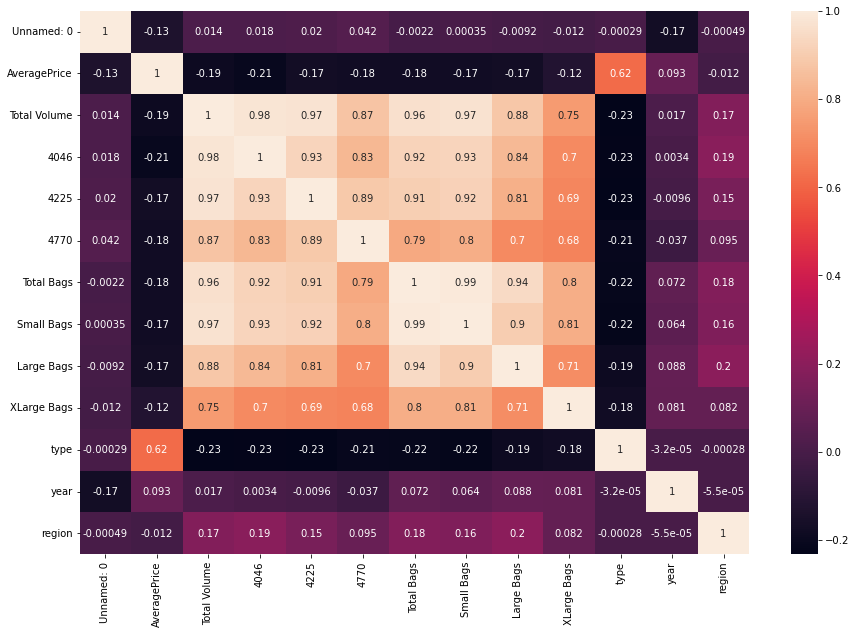

In [204]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [205]:
#correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

In [206]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)
class_df.drop("Unnamed: 0",axis=1, inplace=True)

In [207]:
class_df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  
0     8603.62       93.25          0.0     0       0  
1     9408.07       97.49          0.0     0       0  
2     8042.21      103.14          0.0     0       0  
3     5677.40      133.76          0.0     0       0  
4     5986.26      197.69          0.0     0       0

# Outliers Detection and Removal:

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
region                AxesSubplot(0.125,0.125;0.133621x0.222059)
dtype: object

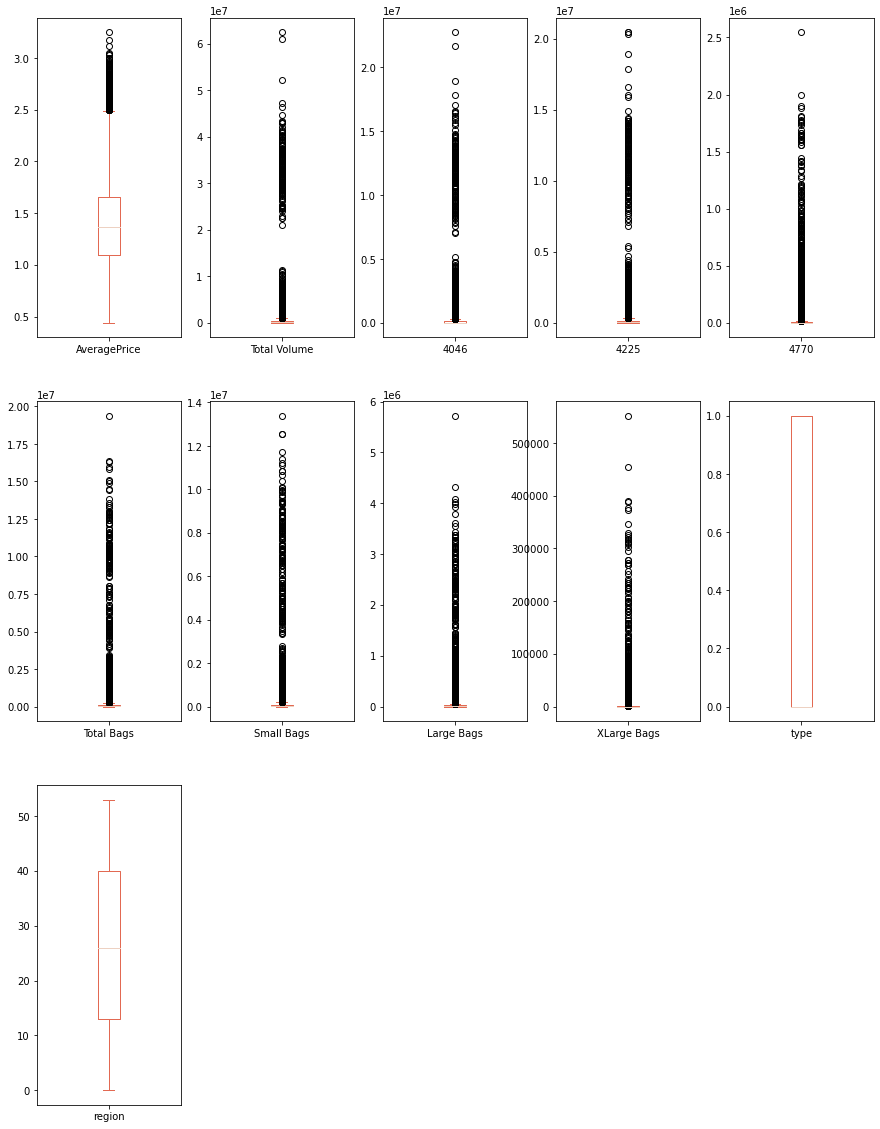

In [208]:
class_df.plot(kind ='box', subplots =True , layout =(3,5), figsize = (15,20))

In [209]:
# Observation

# Can see lot of outliers present. Will be removing the outliers using the z score method

In [210]:
from scipy.stats import zscore
z = np.abs(zscore(class_df))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([2, 2, 8, ..., 0, 0, 0]))


In [211]:
class_df1 = class_df[(z<3).all(axis = 1)]
class_df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  
0     8603.62       93.25          0.0     0       0  
1     9408.07       97.49          0.0     0       0  
2     8042.21      103.14          0.0     0       0  
3     5677.40      133.76          0.0     0       0  
4     5986.26      197.69          0.0     0       0

In [212]:
class_df1.shape

(17651, 11)

In [213]:
class_df.shape

(18249, 11)

In [214]:
# Observations:

# the data loss= (18249-17651)= 598 datapoints



# Checking Skewness:

In [215]:
class_df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

In [216]:
# Observations:
# The standard range for skewness is between -0.5 to 0.5.
# Data is skewed so will use the tranformation method and remove the skewness

In [217]:
new_class_df1= class_df1.copy()

In [218]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Total Volume', '4046', '4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
new_class_df1[features]= scaler.fit_transform(new_class_df1[features].values)
new_class_df1[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   

   Large Bags  XLarge Bags  
0   -0.781153    -0.677919  
1   -0.771198    -0.677919  
2   -0.758523    -0.677919  
3   -0.699123    -0.677919  
4   -0.607027    -0.677919

In [220]:
new_class_df1.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
region          0.012798
dtype: float64

In [222]:
# Observation

# Skewness removed from the database

# Splitting the Data set

In [223]:
x = new_class_df1.drop("region", axis=1)
y = new_class_df1["region"]
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1              1.35     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2              0.93      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3              1.08      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4              1.28     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.678214 -0.462066 -0.926028 -1.228986   -0.340422   
18245          1.71     -0.771326 -0.618019 -0.670600 -1.228986   -0.509513   
18246          1.87     -0.775274 -0.617966 -0.778893  0.445710   -0.503366   
18247          1.93     -0.701797 -0.547011 -0.716371  0.445399   -0.434176   
18248          1.62     -0.667381 -0.359671 -0.791650  0.157768   -0.393236   

       Small Bags  Large Bags  XLarge Bags  type  
0       -0.347421   -0.781153    -0.677919     0  
1       -0.311322   -0.771198    -0.677919     0  
2       -0.374453   -0.758523    -0.677919     0  
3       -0.510991   -0.699123    -0.677919     0  
4       -0.490534   -0.607027    -0.677919     0  
...           ...         ...          ...   ...  
18244   -0.175753   -0.412401    -0.677919     1  
18245   -0.331971   -0.484991    -0.677919     1  
18246   -0.313756   -0.950743    -0.677919     1  
18247   -0.250408   -0.916068    -0.677919     1  
18248   -0.211755   -1.048116    -0.677919     1  

[17651 rows x 10 columns]

In [224]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int64

# Standard Scaler

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Checking Multicollinearity:

In [226]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns


vif

VIF values      Features
0    1.986875  AveragePrice
1   54.876899  Total Volume
2    6.823674          4046
3   12.149276          4225
4    3.783314          4770
5   34.812917    Total Bags
6   17.282901    Small Bags
7    3.441783    Large Bags
8    1.976469   XLarge Bags
9    4.135078          type

In [227]:
x.drop('Total Volume',inplace=True,axis=1)
x.drop('Total Bags',axis=True,inplace=True)

In [228]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.819864  AveragePrice
1    3.508616          4046
2    4.186756          4225
3    3.768090          4770
4    3.573803    Small Bags
5    1.873806    Large Bags
6    1.963228   XLarge Bags
7    3.984937          type

In [229]:
# Observation

# Vif is < 10, we can proceed as of now

# Model Building

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.793429003021148  on Random_state  100


In [231]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=100)

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


# Decision Tree Classifier

In [233]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7907108467856131
[[61  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  3]
 [ 0  0 67 ...  0  0  1]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        73
           1       0.75      0.73      0.74        79
           2       0.93      0.92      0.92        73
           3       0.80      0.78      0.79        65
           4       0.89      0.81      0.85        63
           5       0.71      0.80      0.75        65
           6       0.92      0.96      0.94        71
           7       0.75      0.83      0.79        65
           8       0.89      0.93      0.91        70
           9       0.74      0.81      0.77        67
          10       0.86      0.72      0.78        67
          11       0.85      0.88      0.87        59
          12       0.91      0.87      0.89        78
          13       0.70      0.72      0.71        68
          14  

# Logistic Regression

In [234]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.47946757292551684
[[45  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  4]
 ...
 [ 0  0  0 ... 30  1  0]
 [ 0  0  0 ...  1 41  0]
 [ 0  1  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        73
           1       0.30      0.46      0.36        79
           2       0.63      0.55      0.59        73
           3       0.53      0.48      0.50        65
           4       0.47      0.44      0.46        63
           5       0.45      0.40      0.42        65
           6       0.80      0.83      0.81        71
           7       0.46      0.60      0.52        65
           8       0.62      0.76      0.68        70
           9       0.44      0.79      0.57        67
          10       0.63      0.33      0.43        67
          11       0.41      0.68      0.51        59
          12       0.38      0.47      0.42        78
          13       0.18      0.18      0.18        68
          14 

# Random Forest Classifier

In [235]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8994619088077032
[[64  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  0  0 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        73
           1       0.82      0.86      0.84        79
           2       0.97      1.00      0.99        73
           3       0.89      0.85      0.87        65
           4       0.85      0.89      0.87        63
           5       0.84      0.89      0.87        65
           6       0.96      1.00      0.98        71
           7       0.87      0.92      0.90        65
           8       1.00      0.96      0.98        70
           9       0.85      0.93      0.89        67
          10       0.92      0.87      0.89        67
          11       0.90      0.95      0.93        59
          12       0.92      0.99      0.95        78
          13       0.84      0.76      0.80        68
          14  

# Support vector machine

In [236]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7779665817048994
[[68  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  0 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        73
           1       0.63      0.59      0.61        79
           2       0.93      0.93      0.93        73
           3       0.89      0.77      0.83        65
           4       0.76      0.76      0.76        63
           5       0.84      0.71      0.77        65
           6       1.00      1.00      1.00        71
           7       0.69      0.77      0.73        65
           8       0.97      0.96      0.96        70
           9       0.64      0.87      0.73        67
          10       0.69      0.61      0.65        67
          11       0.74      0.95      0.83        59
          12       0.81      0.96      0.88        78
          13       0.48      0.51      0.50        68
          14  

# Knn

In [237]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8357405834041348
[[66  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  1]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  0 ...  0  0 58]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        73
           1       0.75      0.80      0.77        79
           2       0.93      0.97      0.95        73
           3       0.83      0.75      0.79        65
           4       0.78      0.84      0.81        63
           5       0.82      0.82      0.82        65
           6       0.96      1.00      0.98        71
           7       0.80      0.94      0.87        65
           8       0.93      0.93      0.93        70
           9       0.67      0.79      0.73        67
          10       0.72      0.70      0.71        67
          11       0.83      0.97      0.89        59
          12       0.85      0.97      0.91        78
          13       0.70      0.72      0.71        68
          14  

# Cross Validation Score

In [238]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5520969189926855


In [239]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6803587167644249


In [240]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.3480263116724952


In [241]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6116921030484346


In [242]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.5985486861412836


In [243]:
# As I am going to take the final model as Random Forest, I will be performing hyper parameter tunning on the same.

# Hyperparameter Tuning¶

In [244]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [245]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'auto', 'n_estimators': 150}


In [246]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.54092325120362


# Random Forest Classifier predicts very good Accuracy of 90.54%

# Model Saving

In [247]:
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# Prediction

In [248]:
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([16, 26, 18, ..., 16, 14, 48])

# AUC-ROC curve

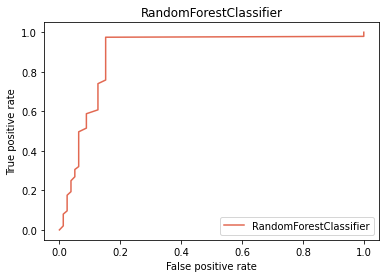

In [249]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

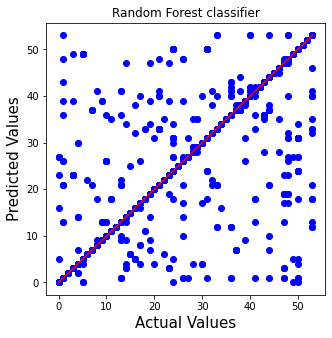

In [250]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='b')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'r')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

# Conclusion Random Forest Method Predicts good accuracy for this Dataset